In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
df = pd.read_csv('./data/interpolated_data.csv')
df.head(5)
# Make sure Time Period is the index
df = df.set_index('Time Period')
df

KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier)  \
Time Period                                                                                      
1988-01-01                                                 2.0                                   
1988-02-01                                                 2.0                                   
1988-03-01                                                 2.0                                   
1988-04-01                                                 2.0                                   
1988-05-01                                                 2.0                                   
...                                                        ...                                   
2023-08-01                                                -1.4                                   
2023-09-01                                                -1.5                                   
2023-10-01                                                -2.4                                   
2023-11-01                                                -2.4                                   
2023-12-01                                                -2.4                                   

             KPSA3 All retailing excl. automotive fuel (%-change on previous month)  \
Time Period                                                                           
1988-01-01                                                -2.3                        
1988-02-01                                                -2.3                        
1988-03-01                                                 0.4                        
1988-04-01                                                 1.5                        
1988-05-01                                                -0.3                        
...                                                        ...                        
2023-08-01                                                 0.5                        
2023-09-01                                                -1.3                        
2023-10-01                                                -0.1                        
2023-11-01                                                -0.1                        
2023-12-01                                                -0.1                        

             Days Of Airfrost  Days With Over 1Mm Rain  Min Temperature (C)  \
Time Period                                                                   
1988-01-01                8.6                     21.1                  1.5   
1988-02-01                9.5                     13.7                  1.1   
1988-03-01                8.2                     18.5                  2.0   
1988-04-01                5.2                      9.1                  3.3   
1988-05-01                0.5                     10.8                  6.0   
...                       ...                      ...                  ...   
2023-08-01                0.0                     14.5                 11.4   
2023-09-01                0.0                     13.5                 11.0   
2023-10-01                1.1                     16.9                  7.6   
2023-11-01                6.2                     16.3                  3.4   
2023-12-01               32.5                     38.6                  1.3   

             Max Temperature (C)  Mean Temperature (C)  Rainfall In Mm   \
Time Period                                                               
1988-01-01                  6.70                  4.10            169.9   
1988-02-01                  6.70                  3.90             90.3   
1988-03-01                  8.20                  5.10            126.6   
1988-04-01                 11.00                  7.10             52.8   
1988-05-01                 15.00                 10.50             58.5   
...                          ...                   ..

In [5]:
# rename columns so easier to access with .loc function
df = df.rename(columns={'KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier)':'KPSA1',
                        'KPSA3 All retailing excl. automotive fuel (%-change on previous month)':'KPSA3'
    })
df

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1988-01-01     2.0   -2.3               8.6                     21.1   
1988-02-01     2.0   -2.3               9.5                     13.7   
1988-03-01     2.0    0.4               8.2                     18.5   
1988-04-01     2.0    1.5               5.2                      9.1   
1988-05-01     2.0   -0.3               0.5                     10.8   
...            ...    ...               ...                      ...   
2023-08-01    -1.4    0.5               0.0                     14.5   
2023-09-01    -1.5   -1.3               0.0                     13.5   
2023-10-01    -2.4   -0.1               1.1                     16.9   
2023-11-01    -2.4   -0.1               6.2                     16.3   
2023-12-01    -2.4   -0.1              32.5                     38.6   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01                   1.5                 6.70                  4.10   
1988-02-01                   1.1                 6.70                  3.90   
1988-03-01                   2.0                 8.20                  5.10   
1988-04-01                   3.3                11.00                  7.10   
1988-05-01                   6.0                15.00                 10.50   
...                          ...                  ...                   ...   
2023-08-01                  11.4                19.30                 15.30   
2023-09-01                  11.0                19.40                 15.20   
2023-10-01                   7.6                14.00                 10.80   
2023-11-01                   3.4                 9.30                  6.30   
2023-12-01                   1.3                 7.34                  4.31   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01             169.9               46.9  
1988-02-01              90.3               87.7  
1988-03-01             126.6               89.2  
1988-04-01              52.8              128.7  
1988-05-01              58.5              190.7  
...                      ...                ...  
2023-08-01              89.1              148.1  
2023-09-01             119.4              142.4  
2023-10-01             171.5               84.8  
2023-11-01             118.9               64.6  
2023-12-01             285.2              182.7  

[432 rows x 9 columns]

# Statistical analysis
Identify key series of the dataset and provide statistical summary of the data,
including:
- Measures of central tendency
- Measures of spread
- Type of distribution
This can be done by using libraries such as NumPy, pandas and SciPy. Most likely
the dataset will consist of multiple series.

A statistical analysis of this dataset can help us highlight patterns and trends in these time series, and therefore to focus in on what we want to present and how. We will begin by looking at the univariate statistics for these time series before proceeeding to look at the correlations between the weather and the sales percentage changes in volume.

## Measures of Central Tendency

As explained in the introduction, both the sales volume figures recorded by the Office of National Statistics used here and the Met Office weather records are a sample of the total population of these figures. The MetOffice weather data is based on a 1kmx1km grid-interpolation of weather metrics over the land surface of the UK, and it is important to remember that these data are estimates of the real weather averages in the UK during these months. Here, we will assume that this sample is representative of the population as a whole. [NB](https://pub.towardsai.net/here-is-why-you-probably-use-numpy-std-incorrectly-276c40aaf82e#:~:text=Explaining%20np.&text=std%20and%20pandas%20std%20functions,5): Pandas standard deviation function automatically uses Bessel's correction to adapt this function to samples of the population by dividing by N-1 rather than N.

In [6]:
# The first thing to do is ensure that the index loaded from the csv file is a DatetimeIndex, otherwise it is impossible
# to compute statisitcs for months
df.index = pd.to_datetime(df.index)

In [7]:
# Here we can see the mean, standard deviation and percentile values for all the time series in the dataset, as well as the minimum
# and maximum values. As we can see, the standard deviation is higher for the %-change in retail sales on the same month a year earlier than
# the percentage-change on the previous month, which seems reasonable, as it is expected that there would be more variation from year-to-year
# than from month to month.
# The hours of sunshine time series has an exceptionally high standard deviation compared to the other weather values.
df.describe() 

KPSA1       KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
count  432.000000  432.000000        432.000000               432.000000   
mean     1.988426    0.160648          4.418519                13.243287   
std      3.489528    1.586567          5.245980                 4.136253   
min    -18.400000  -14.700000          0.000000                 4.000000   
25%      0.500000   -0.400000          0.000000                10.400000   
50%      2.100000    0.200000          2.500000                13.200000   
75%      3.700000    0.800000          7.325000                15.925000   
max     36.100000   12.800000         32.500000                38.600000   

       Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
count           432.000000           432.000000            432.000000   
mean              5.540278            12.817917              9.158819   
std               3.797135             4.852409              4.289671   
min              -4.100000             2.400000             -0.900000   
25%               2.200000             8.400000              5.300000   
50%               5.150000            12.400000              8.750000   
75%               9.000000            17.225000             13.100000   
max              12.700000            23.300000             17.800000   

       Rainfall In Mm   Hours Of Sunshine  
count       432.000000         432.000000  
mean         96.939815         117.941667  
std          40.461759          56.726204  
min          18.400000          21.400000  
25%          66.900000          65.500000  
50%          93.100000         116.850000  
75%         120.300000         160.875000  
max         285.200000         266.900000

In [8]:
# Now compute the median for each column as well as the mean, as this measure of central tendency is less prone to being 
# affected by outliers than the mean
median_scores = df.iloc[:, 0:].median() # use iloc to exclude the datetime index
print(median_scores)

KPSA1                        2.10
KPSA3                        0.20
Days Of Airfrost             2.50
Days With Over 1Mm Rain     13.20
Min Temperature (C)          5.15
Max Temperature (C)         12.40
Mean Temperature (C)         8.75
Rainfall In Mm              93.10
Hours Of Sunshine          116.85
dtype: float64


In [9]:
# Calculate interquartile range per column
interquartile_range = df.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
interquartile_range

KPSA1                       3.200
KPSA3                       1.200
Days Of Airfrost            7.325
Days With Over 1Mm Rain     5.525
Min Temperature (C)         6.800
Max Temperature (C)         8.825
Mean Temperature (C)        7.800
Rainfall In Mm             53.400
Hours Of Sunshine          95.375
dtype: float64

In [10]:
# Shorten names of columns to fit on the plots made in the next cells to visualize distributions of data and box-and-whisker plots
# for detecting outliers
plot_titles = ['KPSA1', 'KPSA3']
plot_titles.extend(df.columns[2:])
plot_titles

['KPSA1',
 'KPSA3',
 'Days Of Airfrost',
 'Days With Over 1Mm Rain',
 'Min Temperature (C)',
 'Max Temperature (C)',
 'Mean Temperature (C)',
 'Rainfall In Mm ',
 'Hours Of Sunshine']

In [11]:
# We will now create some histograms of this data to show and analyse the distributions of the data values
# Reference: how to calculate the right number of bins for histograms https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/

# 1. Get count of datapoints
count_of_datapoints = len(df) # 432 points
print(count_of_datapoints)

# 2. Get the square root of the number of datapoints and round up
nr_bins = int(np.ceil(np.sqrt(count_of_datapoints)))
print(nr_bins) # Number of bins


432
21


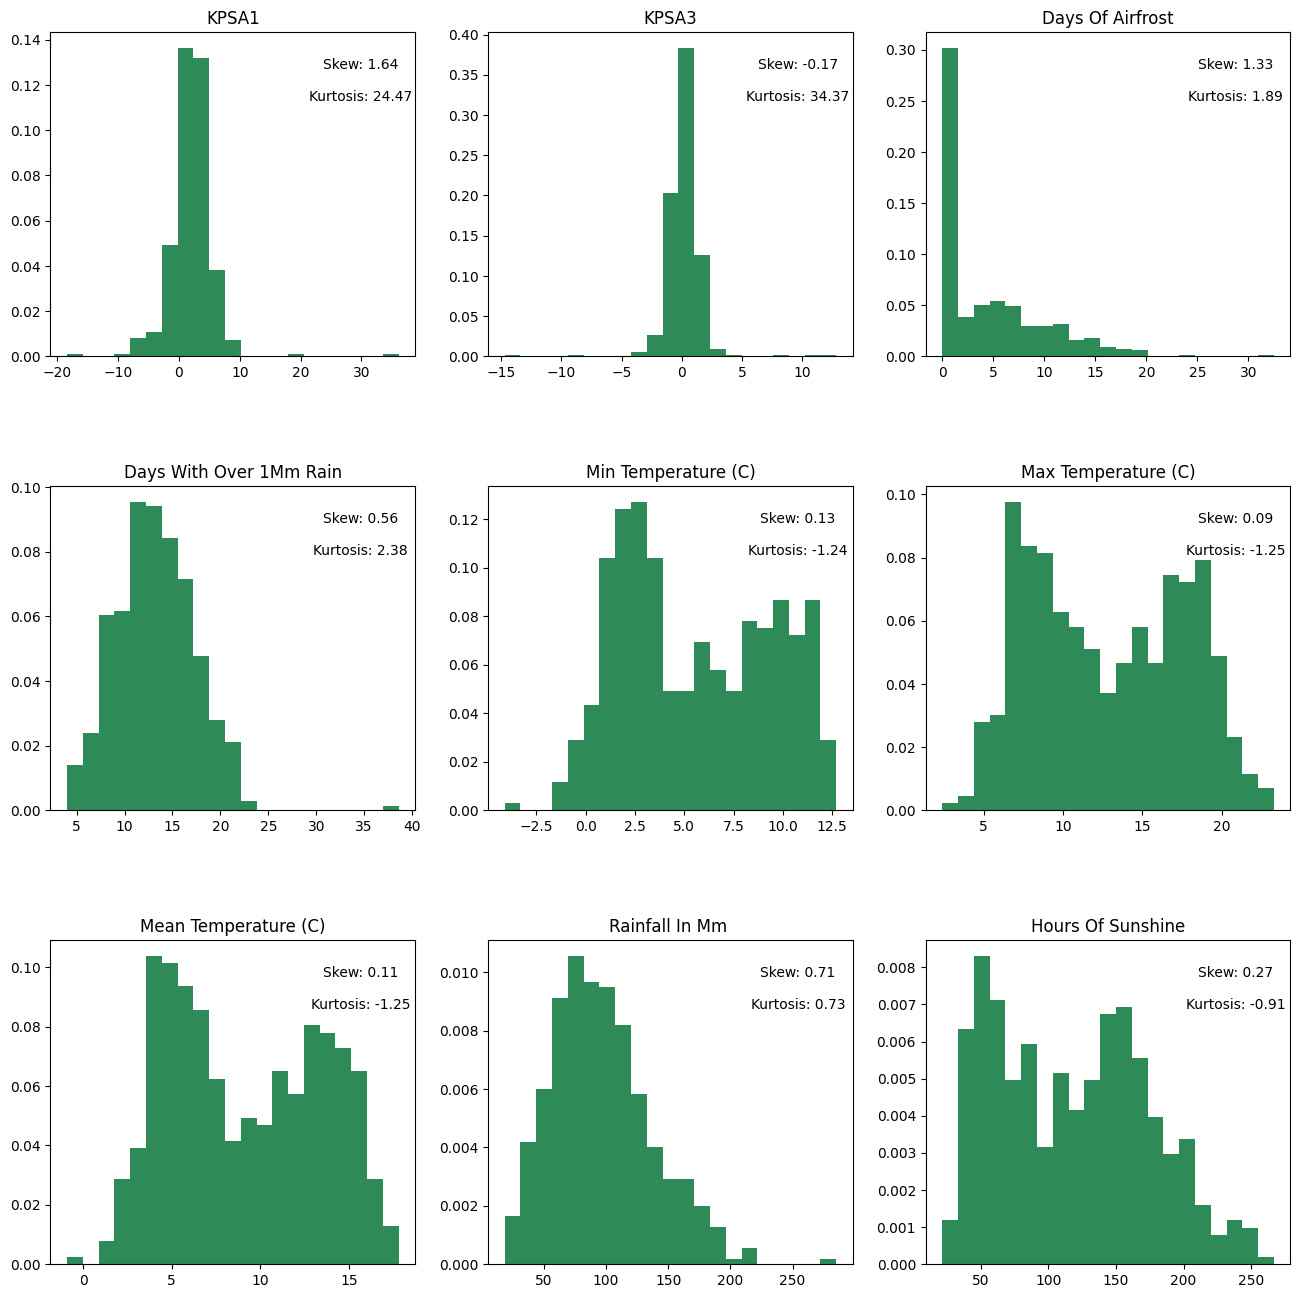

In [12]:
# Create fig and axes with matplotlib to plot histograms for all the 9 columns of time series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.hist(df.iloc[:, idx], bins=nr_bins, density=True, color='seagreen')
        axes[i, j].set_title(plot_titles[idx])

# Calculate the skewness and kurtosis of each distribution and annotate the graph with it
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # Calculate skewness for each variable
        skew = df.iloc[:, idx].skew().round(2)
        # Calculate kurtosis for each column
        kurtosis = df.iloc[:, idx].kurtosis().round(2)
        # Position the 'skew' annotation at the top-right of each plot
        skew_annotation_x = 0.85
        skew_annotation_y = 0.9
        # Position the 'kurtosis' annotion just underneath the skew annotation
        kurtosis_annotation_x = 0.85
        kurtosis_annotation_y = 0.8
        ax.annotate(f"Skew: {skew}", xy=(skew_annotation_x, skew_annotation_y), xycoords='axes fraction', ha='center', va='center')
        ax.annotate(f"Kurtosis: {kurtosis}", xy=(kurtosis_annotation_x, kurtosis_annotation_y), xycoords='axes fraction', ha='center', va='center')

### Analysis of Distributions, Skew and Kurtosis values

As we can see above, only two of these variables approach anything close to a normal distribution (days with over 1mm rain and rainfall in mm), while the others are skewed and do not follow a normal distribution (where [values are distributed symmetrically around the mean](https://www.investopedia.com/terms/n/normaldistribution.asp)).

- **Sales Volume Distributions (KPA1 - % change on month the previous year and KPA3 - % change on the previous month):** as seen above, the distributions for the sales volume percentage changes are asymmetric. This means that the mean and median are [not equal](https://ceopedia.org/index.php/Asymmetrical_distribution), and is common for this kind of real-world data such as sales or stock prices. The disadvantage of this type of distribution is that it can be harder to [predict values due to the potential for extreme values](https://ceopedia.org/index.php/Asymmetrical_distribution). KPA1 (percentage change in retail sales volume on the same month the previous year) has a positive skew of 1.64, meaning that more values lie to the right than to the left of the mean, while KPA3 (percentage change in retail sales volume on the previous month) has a negative skew of -0.17, meaning that slightly more values lie to the left of the mean. What is more concerning here though is that both these sets of values have an extremely high positive kurtosis values (24.47 for KPA1 and 34.37), describing the peaked shape and [heavy tail](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#:~:text=Positive%20kurtosis%20indicates%20heavier%20tails,the%20tailedness%20of%20a%20distribution.) of these distributions. This is known as a [leptokurtic distribution](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#What_Is_Excess_Kurtosis?) and is [often taken to be an indicator of outliers and extreme values](https://fastercapital.com/content/Leptokurtic--Unraveling-Negative-Kurtosis-and-Its-Interpretation.html). The presence of these outliers will be investigated further in the next section (using box-and-whisker plots). These outliers might either reflect extreme, sudden events which impact sales volume fluctuations, or might be due to an error in reporting. The problem with including these outliers in the linear regression model is that it might obscure the effect of weather fluctuations on sales, as the extreme event might have been caused by something completely unrelated to weather.

- **Days of Airfrost:** this distribution has a long peak at around 0-2 days of monthly airfrost, and then there is a decline in the number of entries with increasing days of airfrost per month, which although lacking a normal distribution, does not seem that unusual for the UK.

- **Temperature Distributions and Hours of Sunshine per month Distribution**: these distributions seem to have two peaks and indicate a [bimodal distribution](https://www.statisticshowto.com/what-is-a-bimodal-distribution/). The distributions have a relatively low kurtosis and therefore this does not seem to *necessarily* indicate the presence of **extreme values** which could be a problem for linear regression algorithms.

We can also plot the datapoints for each series as quantile-quantile plots in order to [check the distributions of the data points](https://www.yourdatateacher.com/2021/06/21/how-to-use-q-q-plot-for-checking-the-distribution-of-our-data/).  A QQ plot is a 2D visualization where the quantiles of a specific distribution (e.g. a normal distribution) are compared against the quantiles of our specific datasets. A y=x 45-degree line means that the distributions are the same, whereas curved or S-shape lines mean that the distribution is very different:

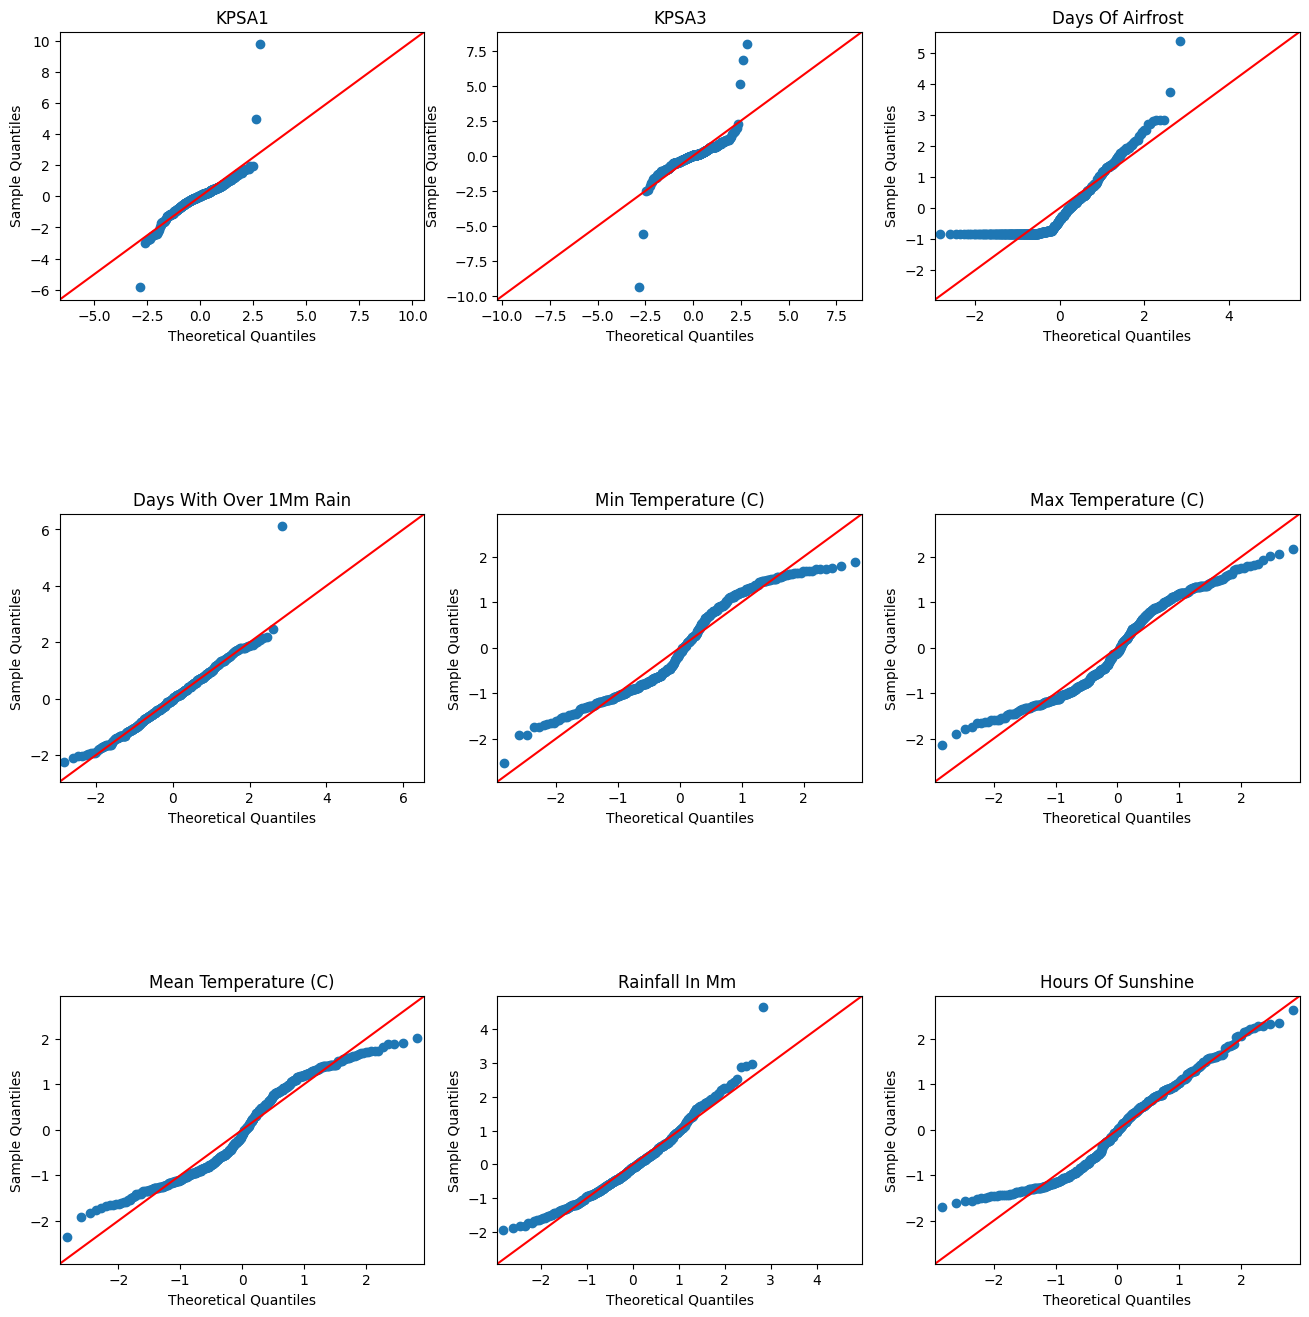

In [13]:
import statsmodels.api as sm 
# Reference: https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

# Make the results deterministic by seeding a value into numpy.random
np.random.seed(1234)

# Create 432 (size of our time series) normally-distributed points for comparing series' distribution to normal distribution
# Mean: 0, standard deviation: 1
data_points = np.random.normal(0, 1, len(df))  

# Create the subplots
fig, axes = fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.8) 

# Iterate over axes object and df columns using basic index calculations for the 9 cols
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # The default distribution to compare against is Gaussian normal distribution
        # Pass in ax to plot on the correct subplot
        # Set fit=True If fit is True to fit parameters automatically using dist.fit (Ref: https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)
        sm.qqplot(df.iloc[:, idx], line='45', ax=ax, fit=True)
        ax.set_title(f'{plot_titles[idx]}')



The QQ plots show once again that most of the time series do not follow a normal distribution except for the rainfall data, which is roughly normal, as the values lie mostly on the 45-degree line. As this might indicate the presence of extreme values/outliers, especially in the KPA series, the presence of such anomolous values should be investigated further:

In [14]:
# To help identify outliers in the time series, we will now use tukey plots (like a box-and-whisker plot) which
# helps us identify the outliers (which we saw earlier during the interpolation phase)

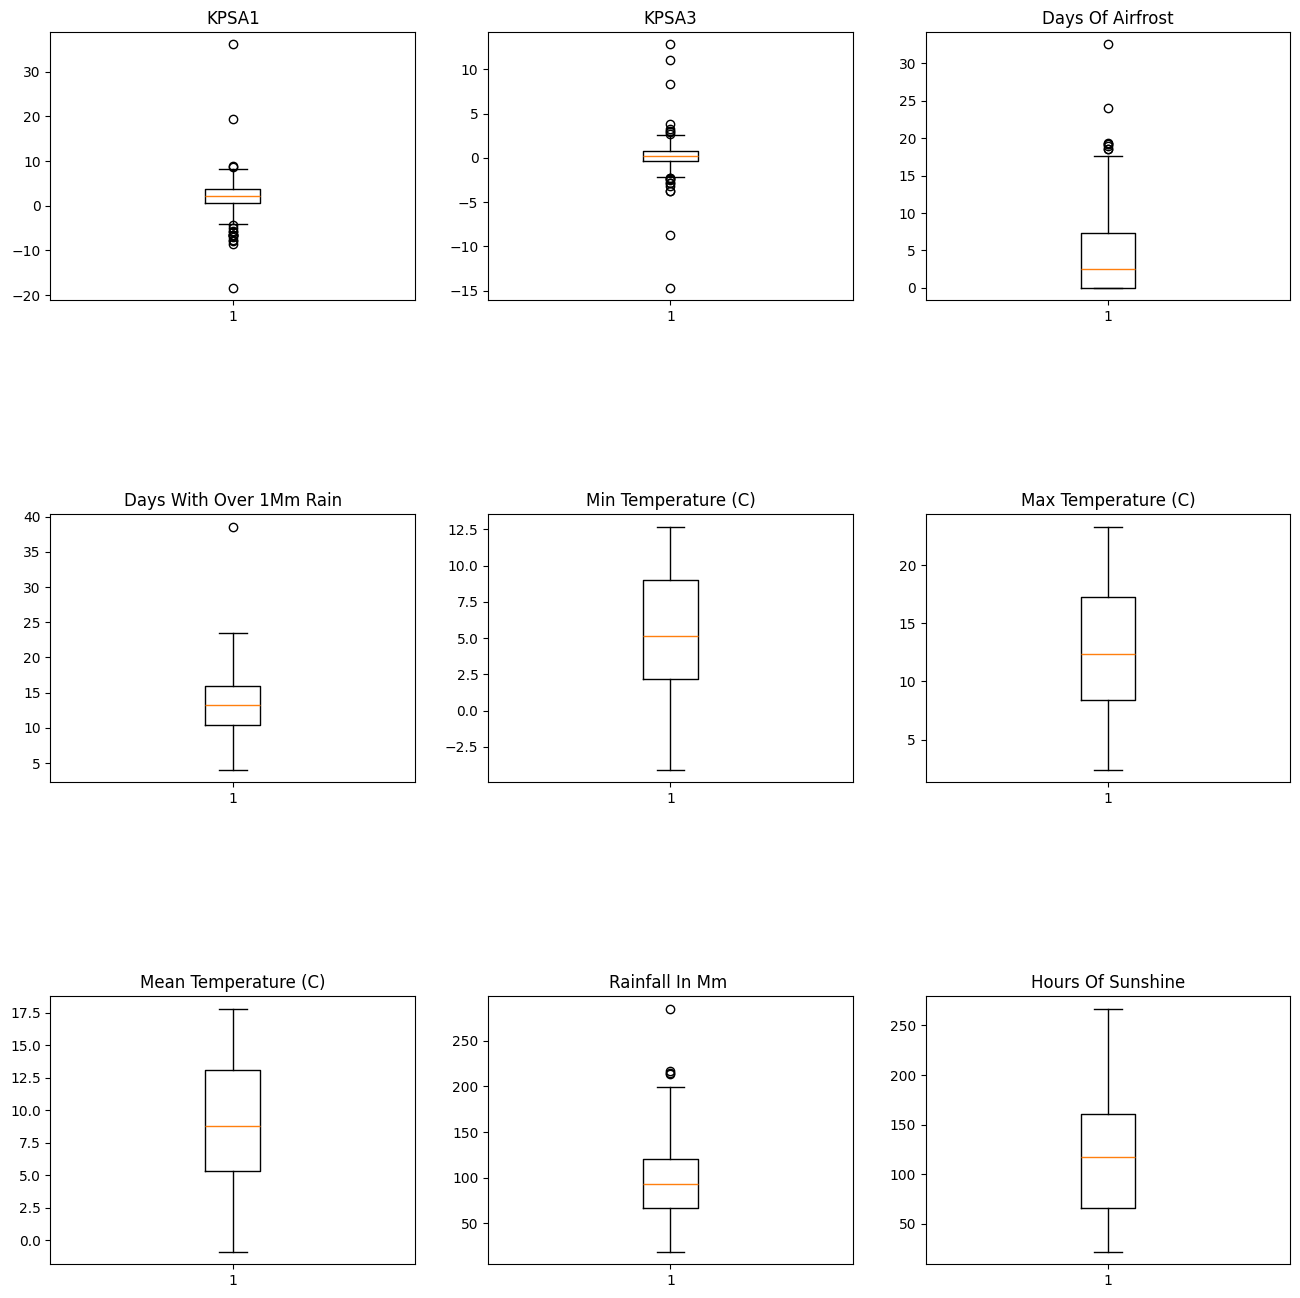

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.8) 

for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.boxplot(df.iloc[:, idx])
        axes[i, j].set_title(plot_titles[idx])

As can be seen above, the percentage-changes in sales volume contain a lot of outlier values and a small inter-quartile range - while the weather data, with the exception of a couple of outliers for rainfall, seems to have relative few outliers and a large inter-quartile range (meaning that half the values in the dataset fall into this range). Outliers are values which deviate [from most of the other values](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/). Visualization allows us easily to see just how many outliers there are in the sales data! Outliers can be [a problem for machine learning algorithms](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.), particularly regression algorithms, making the [regression lines less accurate in making predictions](https://study.com/skill/learn/identifying-the-effects-of-removing-outliers-on-regression-lines-explanation.html). There are [many different methods](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.) for removing these outliers. One of these options is deleting the outliers, but this is has its disadvantages when we already have a relatively small datasets and we don't want to waste any values. Furthermore, as we are working with time-series data, this would introduce jumps and missing values between months, which is not ideal for the linear regression exercise here, as it can reduce the algorithm's ability to detect how patterns develop over time. Moreover, it could be the case that the extreme values in the sales data are actually a reflection of meaningful events rather than measurement errors, in which case, removing them would eliminate the ability to make meaningful conclusions as to the impact of weather data on sales changes. As a result, we will create a copy of this dataset where the outliers are removed and [replaced with the median - less sensitive to outliers than the mean -](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=yes..,the%20power%20of%20statistical%20tests.), so not to lose any data. Then, the linear regression algorithm will be run on both datasets and the performance of the algorithm compared.

In [16]:
## We can detect outliers by checking if a data value is above or below a threshold based on the interquartile range,
## usually defined as quartile1 - 1.5*IQR for values below and quartile3 + 1.5*IQR for values above
## We will also use the pandas groupby function to calculate interquartile range per month, and replace outliers with median for that month,
## to account for the fact that some months might naturally have more variation and unique characteristics which do not apply to the whole dataset
## (e.g. April tends to have more variation in days of airfrost than say, July or August does!)

# Calculate quartiles and interquartile range per month, so quartiles for ever January combined, every February combined, etc.
monthly_quartiles = df.groupby(df.index.month).quantile([0, 0.25, 0.5, 0.75, 1.0])
monthly_quartiles

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                                   
1           0.00  -5.900  -8.700             4.700                    5.700   
            0.25   0.450  -0.975             8.100                   12.250   
            0.50   2.200   0.050            10.450                   15.650   
            0.75   3.400   1.200            14.200                   19.600   
            1.00   8.000   2.300            19.000                   23.500   
2           0.00  -4.000  -2.300             4.000                    6.000   
            0.25   0.850  -0.425             6.475                   10.375   
            0.50   2.350   0.250             9.550                   13.550   
            0.75   3.625   1.225            13.100                   16.100   
            1.00   7.100   2.900            19.300                   21.400   
3           0.00  -4.900  -3.800             3.100                    6.300   
            0.25   0.775  -0.350             5.200                   10.650   
            0.50   1.950   0.250             7.000                   12.200   
            0.75   4.225   0.725             8.575                   16.100   
            1.00   7.800   3.800            19.200                   20.400   
4           0.00 -18.400 -14.700             0.500                    4.000   
            0.25   0.300  -0.425             3.000                    8.175   
            0.50   1.700   0.300             4.350                   11.450   
            0.75   3.850   0.825             5.850                   14.275   
            1.00  36.100   8.300            13.700                   19.100   
5           0.00  -8.500  -2.500             0.000                    5.200   
            0.25   0.575  -0.525             0.475                    8.450   
            0.50   2.100   0.100             0.650                   10.950   
            0.75   3.925   1.125             1.725                   13.750   
            1.00  19.400  11.000             4.300                   16.900   
6           0.00  -6.900  -3.700             0.000                    4.900   
            0.25   1.025  -0.425             0.000                    8.900   
            0.50   2.450   0.200             0.000                   10.650   
            0.75   3.525   0.600             0.100                   14.275   
            1.00   6.800  12.800             0.500                   18.100   
7           0.00  -3.800  -2.900             0.000                    6.400   
            0.25   0.850  -0.100             0.000                    9.275   
            0.50   2.200   0.150             0.000                   11.550   
            0.75   3.600   0.800             0.000                   14.425   
            1.00   7.700   2.700             0.000                   20.600   
8           0.00  -5.600  -1.600             0.000                    4.600   
            0.25   0.725  -0.200             0.000                   11.175   
            0.50   2.250   0.150             0.000                   13.200   
            0.75   3.275   0.525             0.000                   14.725   
            1.00   6.400   2.000             0.100                   18.300   
9           0.00  -6.500  -1.300             0.000                    4.800   
            0.25   0.325  -0.225             0.000                   10.075   
            0.50   2.450  -0.100             0.000                   12.700   
            0.75   3.525   0.400             0.200                   13.625   
            1.00   7.300   2.000             0.600                   18.000   
10          0.00  -6.500  -1.200             0.000                    8.100   
            0.25   0.075  -0.325             0.300                   12.700   
            0.50   2.150   0.300             0.550                   15.750   
            0.75   3.925   0.725             2.500                   

In [17]:
# Do the same for interquartile range by using an anon-function to calculate differences between upper and lower quartiles for each column
monthly_iqrs = df.groupby(df.index.month).apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
monthly_iqrs

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1            2.950  2.175             6.100                    7.350   
2            2.775  1.650             6.625                    5.725   
3            3.450  1.075             3.375                    5.450   
4            3.550  1.250             2.850                    6.100   
5            3.350  1.650             1.250                    5.300   
6            2.500  1.025             0.100                    5.375   
7            2.750  0.900             0.000                    5.150   
8            2.550  0.725             0.000                    3.550   
9            3.200  0.625             0.200                    3.550   
10           3.850  1.050             2.200                    4.800   
11           2.525  0.825             4.050                    4.275   
12           3.275  1.100             5.700                    6.425   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1                          1.125                1.525                 1.300   
2                          1.650                1.550                 1.725   
3                          1.325                1.200                 1.375   
4                          1.025                1.775                 1.350   
5                          1.125                1.500                 1.300   
6                          1.300                1.375                 1.400   
7                          1.275                2.100                 1.825   
8                          1.200                1.250                 1.100   
9                          1.175                1.450                 1.025   
10                         2.025                1.675                 1.850   
11                         1.825                1.550                 1.625   
12                         1.575                1.550                 1.500   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1                     60.825             10.050  
2                     48.000             19.575  
3                     34.725             32.025  
4                     41.575             35.600  
5                     45.600             35.100  
6                     43.100             38.750  
7                     40.100             41.600  
8                     29.550             26.475  
9                     38.525             21.925  
10                    55.475             18.075  
11                    36.300             12.225  
12                    69.675              9.800

In [18]:
# Calculate medians per month too
monthly_medians = df.groupby(df.index.month).median()
monthly_medians

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1             2.20   0.05             10.45                    15.65   
2             2.35   0.25              9.55                    13.55   
3             1.95   0.25              7.00                    12.20   
4             1.70   0.30              4.35                    11.45   
5             2.10   0.10              0.65                    10.95   
6             2.45   0.20              0.00                    10.65   
7             2.20   0.15              0.00                    11.55   
8             2.25   0.15              0.00                    13.20   
9             2.45  -0.10              0.00                    12.70   
10            2.15   0.30              0.55                    15.75   
11            1.85   0.15              5.20                    15.35   
12            1.80   0.10             11.25                    15.75   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1                           1.45                 6.70                 4.050   
2                           1.30                 7.30                 4.450   
3                           2.35                 9.55                 6.050   
4                           3.55                11.80                 7.850   
5                           6.40                15.10                10.750   
6                           9.10                17.70                13.250   
7                          11.10                19.40                15.250   
8                          11.10                19.30                15.150   
9                           8.90                16.90                12.850   
10                          6.35                13.35                 9.800   
11                          3.50                 9.50                 6.550   
12                          1.40                 7.15                 4.305   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1                     123.50              48.15  
2                      89.10              70.80  
3                      86.30             109.35  
4                      67.75             155.20  
5                      64.60             191.05  
6                      65.60             170.15  
7                      77.40             166.45  
8                      87.45             158.45  
9                      94.70             127.05  
10                    127.05              88.40  
11                    117.25              58.25  
12                    119.80              41.90

In [19]:
# Create a new dataframe for storing the times series with outliers replaced by the median
df_without_outliers = df.copy()
df_without_outliers

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1988-01-01     2.0   -2.3               8.6                     21.1   
1988-02-01     2.0   -2.3               9.5                     13.7   
1988-03-01     2.0    0.4               8.2                     18.5   
1988-04-01     2.0    1.5               5.2                      9.1   
1988-05-01     2.0   -0.3               0.5                     10.8   
...            ...    ...               ...                      ...   
2023-08-01    -1.4    0.5               0.0                     14.5   
2023-09-01    -1.5   -1.3               0.0                     13.5   
2023-10-01    -2.4   -0.1               1.1                     16.9   
2023-11-01    -2.4   -0.1               6.2                     16.3   
2023-12-01    -2.4   -0.1              32.5                     38.6   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01                   1.5                 6.70                  4.10   
1988-02-01                   1.1                 6.70                  3.90   
1988-03-01                   2.0                 8.20                  5.10   
1988-04-01                   3.3                11.00                  7.10   
1988-05-01                   6.0                15.00                 10.50   
...                          ...                  ...                   ...   
2023-08-01                  11.4                19.30                 15.30   
2023-09-01                  11.0                19.40                 15.20   
2023-10-01                   7.6                14.00                 10.80   
2023-11-01                   3.4                 9.30                  6.30   
2023-12-01                   1.3                 7.34                  4.31   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01             169.9               46.9  
1988-02-01              90.3               87.7  
1988-03-01             126.6               89.2  
1988-04-01              52.8              128.7  
1988-05-01              58.5              190.7  
...                      ...                ...  
2023-08-01              89.1              148.1  
2023-09-01             119.4              142.4  
2023-10-01             171.5               84.8  
2023-11-01             118.9               64.6  
2023-12-01             285.2              182.7  

[432 rows x 9 columns]

In [20]:
# Use the monthly quartiles dataframe calculated above to calculate upper and lower threshold values for each month and column
# for which the value would be an outlier

# Lists to store a dict for each column storing the monthly lower and upper outlier-thresholds based on IQR
lower_thresholds = []
upper_thresholds = []

# Iterate over the time-series/columns in the quartiles dataframe
for column in monthly_quartiles.columns:
    # Create dicsts to store the monthly thresholds for each column in the dataframe (key will be month nr, and values will be the thresholds)
    column_lower_thresholds = {}
    column_upper_thresholds = {}
    # Iterate over the month inner index using the loc function and the number of the month
    for i in range(1, 13):
        quartiles_for_month = monthly_quartiles[column].loc[i, :]
        # Use .loc to get the 1st and 3rd quartiles for each aggregated month for each column
        lower_quartile = quartiles_for_month.loc[0.25]
        upper_quartile = quartiles_for_month.loc[0.75]
        iqr = upper_quartile - lower_quartile
        # Ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
        # Calculate the threshold for outliers using the upper and lower quartiles
        lower_threshold = lower_quartile - (1.5 * iqr)
        upper_threshold = upper_quartile + (1.5 * iqr)
        # Create a dict-key in the column_lower_thresholds and column_upper_thresholds dicts defined outside this for-loop
        # Each dict key-value pair for these dicts contains the month nr (integer) and the threshold value as the value in the associative array
        column_lower_thresholds[i] = lower_threshold
        column_upper_thresholds[i] = upper_threshold
    # Add the monthly outlier threshold dicts for each column to the lists defined outside of these for-loops
    lower_thresholds.append({column: column_lower_thresholds})
    upper_thresholds.append({column: column_upper_thresholds})

print(lower_thresholds)
print(upper_thresholds)

[{'KPSA1': {1: -3.9749999999999996, 2: -3.3124999999999996, 3: -4.3999999999999995, 4: -5.0249999999999995, 5: -4.449999999999999, 6: -2.725, 7: -3.275, 8: -3.1000000000000014, 9: -4.475, 10: -5.699999999999999, 11: -2.8874999999999997, 12: -4.4375}}, {'KPSA3': {1: -4.2375, 2: -2.9000000000000004, 3: -1.9625, 4: -2.3, 5: -2.9999999999999996, 6: -1.9625, 7: -1.4500000000000002, 8: -1.2875, 9: -1.1625, 10: -1.9000000000000001, 11: -1.5624999999999998, 12: -2.1500000000000004}}, {'Days Of Airfrost': {1: -1.049999999999999, 2: -3.4625000000000004, 3: 0.13750000000000195, 4: -1.2749999999999995, 5: -1.4, 6: -0.15000000000000002, 7: 0.0, 8: 0.0, 9: -0.30000000000000004, 10: -3.0000000000000004, 11: -2.9499999999999993, 12: -1.2000000000000002}}, {'Days With Over 1Mm Rain': {1: 1.2249999999999979, 2: 1.7874999999999979, 3: 2.4749999999999943, 4: -0.9749999999999979, 5: 0.4999999999999982, 6: 0.8375000000000039, 7: 1.5499999999999998, 8: 5.849999999999998, 9: 4.749999999999998, 10: 5.499999999

In [21]:
# Convert thresholds list-of-dicts to a pandas DataFrame using a function

def convertListOfThresholdDictToDF(list_of_dicts, column_names): 
    # Extracts the monthly threshold values from each dictionary
    monthly_threshold_values = [list(column_dictionary.values())[0] for column_dictionary in list_of_dicts]
    # Create a new thresholds df for each column with the column names as the index and months as the columns for now
    thresholds_df = pd.DataFrame(monthly_threshold_values, column_names)
    # Transpose the new DataFrame, so that the column names per var are the columns and the months form the index
    return thresholds_df.transpose()

lower_thresholds_df = convertListOfThresholdDictToDF(lower_thresholds, plot_titles)
upper_thresholds_df = convertListOfThresholdDictToDF(upper_thresholds, plot_titles)
lower_thresholds_df

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  -3.9750 -4.2375           -1.0500                   1.2250   
2  -3.3125 -2.9000           -3.4625                   1.7875   
3  -4.4000 -1.9625            0.1375                   2.4750   
4  -5.0250 -2.3000           -1.2750                  -0.9750   
5  -4.4500 -3.0000           -1.4000                   0.5000   
6  -2.7250 -1.9625           -0.1500                   0.8375   
7  -3.2750 -1.4500            0.0000                   1.5500   
8  -3.1000 -1.2875            0.0000                   5.8500   
9  -4.4750 -1.1625           -0.3000                   4.7500   
10 -5.7000 -1.9000           -3.0000                   5.5000   
11 -2.8875 -1.5625           -2.9500                   6.5375   
12 -4.4375 -2.1500           -1.2000                   2.1125   

    Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
1               -0.9375               3.7375                1.4500   
2               -1.9000               4.2250                0.8875   
3               -0.2125               7.1000                3.1875   
4                1.4625               8.1875                4.9500   
5                4.0125              12.3000                8.0500   
6                6.5500              15.0875               10.6000   
7                8.4625              15.4500               11.6625   
8                8.6000              16.7000               12.8500   
9                6.7875              13.9250               10.8625   
10               2.7375               9.8375                6.3000   
11              -0.0375               6.2750                3.2375   
12              -1.5125               4.0500                1.3500   

    Rainfall In Mm   Hours Of Sunshine  
1            1.5875            28.5250  
2           -1.7500            33.5375  
3           17.4125            40.8625  
4          -14.0375            80.2500  
5          -20.6250           120.6750  
6          -13.3750            97.4500  
7           -1.1250            88.3000  
8           33.0000           108.3875  
9           12.1875            83.6625  
10          16.7625            55.8375  
11          45.1500            34.3375  
12          -7.4875            21.5000

In [22]:
upper_thresholds_df

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1   7.8250  4.4625           23.3500                  30.6250   
2   7.7875  3.7000           23.0375                  24.6875   
3   9.4000  2.3375           13.6375                  24.2750   
4   9.1750  2.7000           10.1250                  23.4250   
5   8.9500  3.6000            3.6000                  21.7000   
6   7.2750  2.1375            0.2500                  22.3375   
7   7.7250  2.1500            0.0000                  22.1500   
8   7.1000  1.6125            0.0000                  20.0500   
9   8.3250  1.3375            0.5000                  18.9500   
10  9.7000  2.3000            5.8000                  24.7000   
11  7.2125  1.7375           13.2500                  23.6375   
12  8.6625  2.2500           21.6000                  27.8125   

    Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
1                3.5625               9.8375                6.6500   
2                4.7000              10.4250                7.7875   
3                5.0875              11.9000                8.6875   
4                5.5625              15.2875               10.3500   
5                8.5125              18.3000               13.2500   
6               11.7500              20.5875               16.2000   
7               13.5625              23.8500               18.9625   
8               13.4000              21.7000               17.2500   
9               11.4875              19.7250               14.9625   
10              10.8375              16.5375               13.7000   
11               7.2625              12.4750                9.7375   
12               4.7875              10.2500                7.3500   

    Rainfall In Mm   Hours Of Sunshine  
1          244.8875            68.7250  
2          190.2500           111.8375  
3          156.3125           168.9625  
4          152.2625           222.6500  
5          161.7750           261.0750  
6          159.0250           252.4500  
7          159.2750           254.7000  
8          151.2000           214.2875  
9          166.2875           171.3625  
10         238.6625           128.1375  
11         190.3500            83.2375  
12         271.2125            60.7000

In [23]:
# Create a Multi-Index on these two threshold dataframes in order to combine them for easier slicing and indexing
# Ref: https://pandas.pydata.org/docs/user_guide/advanced.html
# Ref: https://sparkbyexamples.com/pandas/pandas-multiindex-dataframe-examples/

## Turn the dataframe into the dataframe with a multi-index, with the inner index representing the type of threshold
def convertToMultiIndex(df, threshold_type):
    # Create a list of threshold name 12 times by *-ing the string and then splitting on the space character, then extracting the first 12 values
    multi_index_threshold_type = list((threshold_type * len(df)).split(' ')[0:len(df)])
    # Create list of the months from original dataframe
    multi_index_months = list(df.index)
    multi_index_arrays = [multi_index_months, multi_index_threshold_type]
    multi_index_tuples = list(zip(*multi_index_arrays))
    multi_index = pd.MultiIndex.from_tuples(multi_index_tuples)
    # Create new dataframe with the multiindex
    multi_index_df = pd.DataFrame(df.values, columns = df.columns, index = multi_index)
    return multi_index_df

# Apply the function to the lower thresholds dataframe
lower_thresholds_df_multi_index = convertToMultiIndex(lower_thresholds_df, 'LowerThreshold ')
lower_thresholds_df_multi_index

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  LowerThreshold -3.9750 -4.2375           -1.0500                   1.2250   
2  LowerThreshold -3.3125 -2.9000           -3.4625                   1.7875   
3  LowerThreshold -4.4000 -1.9625            0.1375                   2.4750   
4  LowerThreshold -5.0250 -2.3000           -1.2750                  -0.9750   
5  LowerThreshold -4.4500 -3.0000           -1.4000                   0.5000   
6  LowerThreshold -2.7250 -1.9625           -0.1500                   0.8375   
7  LowerThreshold -3.2750 -1.4500            0.0000                   1.5500   
8  LowerThreshold -3.1000 -1.2875            0.0000                   5.8500   
9  LowerThreshold -4.4750 -1.1625           -0.3000                   4.7500   
10 LowerThreshold -5.7000 -1.9000           -3.0000                   5.5000   
11 LowerThreshold -2.8875 -1.5625           -2.9500                   6.5375   
12 LowerThreshold -4.4375 -2.1500           -1.2000                   2.1125   

                   Min Temperature (C)  Max Temperature (C)  \
1  LowerThreshold              -0.9375               3.7375   
2  LowerThreshold              -1.9000               4.2250   
3  LowerThreshold              -0.2125               7.1000   
4  LowerThreshold               1.4625               8.1875   
5  LowerThreshold               4.0125              12.3000   
6  LowerThreshold               6.5500              15.0875   
7  LowerThreshold               8.4625              15.4500   
8  LowerThreshold               8.6000              16.7000   
9  LowerThreshold               6.7875              13.9250   
10 LowerThreshold               2.7375               9.8375   
11 LowerThreshold              -0.0375               6.2750   
12 LowerThreshold              -1.5125               4.0500   

                   Mean Temperature (C)  Rainfall In Mm   Hours Of Sunshine  
1  LowerThreshold                1.4500           1.5875            28.5250  
2  LowerThreshold                0.8875          -1.7500            33.5375  
3  LowerThreshold                3.1875          17.4125            40.8625  
4  LowerThreshold                4.9500         -14.0375            80.2500  
5  LowerThreshold                8.0500         -20.6250           120.6750  
6  LowerThreshold               10.6000         -13.3750            97.4500  
7  LowerThreshold               11.6625          -1.1250            88.3000  
8  LowerThreshold               12.8500          33.0000           108.3875  
9  LowerThreshold               10.8625          12.1875            83.6625  
10 LowerThreshold                6.3000          16.7625            55.8375  
11 LowerThreshold                3.2375          45.1500            34.3375  
12 LowerThreshold                1.3500          -7.4875            21.5000

In [24]:
# Apply the function to the upper thresholds dataframe
upper_thresholds_df_multi_index = convertToMultiIndex(upper_thresholds_df, 'UpperThreshold ')
upper_thresholds_df_multi_index

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  UpperThreshold  7.8250  4.4625           23.3500                  30.6250   
2  UpperThreshold  7.7875  3.7000           23.0375                  24.6875   
3  UpperThreshold  9.4000  2.3375           13.6375                  24.2750   
4  UpperThreshold  9.1750  2.7000           10.1250                  23.4250   
5  UpperThreshold  8.9500  3.6000            3.6000                  21.7000   
6  UpperThreshold  7.2750  2.1375            0.2500                  22.3375   
7  UpperThreshold  7.7250  2.1500            0.0000                  22.1500   
8  UpperThreshold  7.1000  1.6125            0.0000                  20.0500   
9  UpperThreshold  8.3250  1.3375            0.5000                  18.9500   
10 UpperThreshold  9.7000  2.3000            5.8000                  24.7000   
11 UpperThreshold  7.2125  1.7375           13.2500                  23.6375   
12 UpperThreshold  8.6625  2.2500           21.6000                  27.8125   

                   Min Temperature (C)  Max Temperature (C)  \
1  UpperThreshold               3.5625               9.8375   
2  UpperThreshold               4.7000              10.4250   
3  UpperThreshold               5.0875              11.9000   
4  UpperThreshold               5.5625              15.2875   
5  UpperThreshold               8.5125              18.3000   
6  UpperThreshold              11.7500              20.5875   
7  UpperThreshold              13.5625              23.8500   
8  UpperThreshold              13.4000              21.7000   
9  UpperThreshold              11.4875              19.7250   
10 UpperThreshold              10.8375              16.5375   
11 UpperThreshold               7.2625              12.4750   
12 UpperThreshold               4.7875              10.2500   

                   Mean Temperature (C)  Rainfall In Mm   Hours Of Sunshine  
1  UpperThreshold                6.6500         244.8875            68.7250  
2  UpperThreshold                7.7875         190.2500           111.8375  
3  UpperThreshold                8.6875         156.3125           168.9625  
4  UpperThreshold               10.3500         152.2625           222.6500  
5  UpperThreshold               13.2500         161.7750           261.0750  
6  UpperThreshold               16.2000         159.0250           252.4500  
7  UpperThreshold               18.9625         159.2750           254.7000  
8  UpperThreshold               17.2500         151.2000           214.2875  
9  UpperThreshold               14.9625         166.2875           171.3625  
10 UpperThreshold               13.7000         238.6625           128.1375  
11 UpperThreshold                9.7375         190.3500            83.2375  
12 UpperThreshold                7.3500         271.2125            60.7000

In [25]:
combined_thresholds_df = pd.concat([lower_thresholds_df_multi_index, upper_thresholds_df_multi_index], axis=0)
combined_thresholds_df

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  LowerThreshold -3.9750 -4.2375           -1.0500                   1.2250   
2  LowerThreshold -3.3125 -2.9000           -3.4625                   1.7875   
3  LowerThreshold -4.4000 -1.9625            0.1375                   2.4750   
4  LowerThreshold -5.0250 -2.3000           -1.2750                  -0.9750   
5  LowerThreshold -4.4500 -3.0000           -1.4000                   0.5000   
6  LowerThreshold -2.7250 -1.9625           -0.1500                   0.8375   
7  LowerThreshold -3.2750 -1.4500            0.0000                   1.5500   
8  LowerThreshold -3.1000 -1.2875            0.0000                   5.8500   
9  LowerThreshold -4.4750 -1.1625           -0.3000                   4.7500   
10 LowerThreshold -5.7000 -1.9000           -3.0000                   5.5000   
11 LowerThreshold -2.8875 -1.5625           -2.9500                   6.5375   
12 LowerThreshold -4.4375 -2.1500           -1.2000                   2.1125   
1  UpperThreshold  7.8250  4.4625           23.3500                  30.6250   
2  UpperThreshold  7.7875  3.7000           23.0375                  24.6875   
3  UpperThreshold  9.4000  2.3375           13.6375                  24.2750   
4  UpperThreshold  9.1750  2.7000           10.1250                  23.4250   
5  UpperThreshold  8.9500  3.6000            3.6000                  21.7000   
6  UpperThreshold  7.2750  2.1375            0.2500                  22.3375   
7  UpperThreshold  7.7250  2.1500            0.0000                  22.1500   
8  UpperThreshold  7.1000  1.6125            0.0000                  20.0500   
9  UpperThreshold  8.3250  1.3375            0.5000                  18.9500   
10 UpperThreshold  9.7000  2.3000            5.8000                  24.7000   
11 UpperThreshold  7.2125  1.7375           13.2500                  23.6375   
12 UpperThreshold  8.6625  2.2500           21.6000                  27.8125   

                   Min Temperature (C)  Max Temperature (C)  \
1  LowerThreshold              -0.9375               3.7375   
2  LowerThreshold              -1.9000               4.2250   
3  LowerThreshold              -0.2125               7.1000   
4  LowerThreshold               1.4625               8.1875   
5  LowerThreshold               4.0125              12.3000   
6  LowerThreshold               6.5500              15.0875   
7  LowerThreshold               8.4625              15.4500   
8  LowerThreshold               8.6000              16.7000   
9  LowerThreshold               6.7875              13.9250   
10 LowerThreshold               2.7375               9.8375   
11 LowerThreshold              -0.0375               6.2750   
12 LowerThreshold              -1.5125               4.0500   
1  UpperThreshold               3.5625               9.8375   
2  UpperThreshold               4.7000              10.4250   
3  UpperThreshold               5.0875              11.9000   
4  UpperThreshold               5.5625              15.2875   
5  UpperThreshold               8.5125              18.3000   
6  UpperThreshold              11.7500              20.5875   
7  UpperThreshold              13.5625              23.8500   
8  UpperThreshold              13.4000              21.7000   
9  UpperThreshold              11.4875              19.7250   
10 UpperThreshold              10.8375              16.5375   
11 UpperThreshold               7.2625              12.4750   
12 UpperThreshold               4.7875              10.2500   

                   Mean Temperature (C)  Rainfall In Mm   Hours Of Sunshine  
1  LowerThreshold                1.4500           1.5875            28.5250  
2  LowerThreshold                0.8875          -1.7500            33.5375  
3  LowerThreshold                3.1875          17.4125            40.8625  
4  LowerThreshold                4.9500         -14.0375            80.2500  
5  LowerThreshold                8.0500         -20.6

In [26]:
# Sort the dataframe by multi-index so the same months are consecutive to one another
combined_thresholds_df_sorted = combined_thresholds_df.sort_index(level=[0, 1])
combined_thresholds_df_sorted # Done! Now we're ready to apply these thresholds to replace outliers with the median

KPSA1   KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
1  LowerThreshold -3.9750 -4.2375           -1.0500                   1.2250   
   UpperThreshold  7.8250  4.4625           23.3500                  30.6250   
2  LowerThreshold -3.3125 -2.9000           -3.4625                   1.7875   
   UpperThreshold  7.7875  3.7000           23.0375                  24.6875   
3  LowerThreshold -4.4000 -1.9625            0.1375                   2.4750   
   UpperThreshold  9.4000  2.3375           13.6375                  24.2750   
4  LowerThreshold -5.0250 -2.3000           -1.2750                  -0.9750   
   UpperThreshold  9.1750  2.7000           10.1250                  23.4250   
5  LowerThreshold -4.4500 -3.0000           -1.4000                   0.5000   
   UpperThreshold  8.9500  3.6000            3.6000                  21.7000   
6  LowerThreshold -2.7250 -1.9625           -0.1500                   0.8375   
   UpperThreshold  7.2750  2.1375            0.2500                  22.3375   
7  LowerThreshold -3.2750 -1.4500            0.0000                   1.5500   
   UpperThreshold  7.7250  2.1500            0.0000                  22.1500   
8  LowerThreshold -3.1000 -1.2875            0.0000                   5.8500   
   UpperThreshold  7.1000  1.6125            0.0000                  20.0500   
9  LowerThreshold -4.4750 -1.1625           -0.3000                   4.7500   
   UpperThreshold  8.3250  1.3375            0.5000                  18.9500   
10 LowerThreshold -5.7000 -1.9000           -3.0000                   5.5000   
   UpperThreshold  9.7000  2.3000            5.8000                  24.7000   
11 LowerThreshold -2.8875 -1.5625           -2.9500                   6.5375   
   UpperThreshold  7.2125  1.7375           13.2500                  23.6375   
12 LowerThreshold -4.4375 -2.1500           -1.2000                   2.1125   
   UpperThreshold  8.6625  2.2500           21.6000                  27.8125   

                   Min Temperature (C)  Max Temperature (C)  \
1  LowerThreshold              -0.9375               3.7375   
   UpperThreshold               3.5625               9.8375   
2  LowerThreshold              -1.9000               4.2250   
   UpperThreshold               4.7000              10.4250   
3  LowerThreshold              -0.2125               7.1000   
   UpperThreshold               5.0875              11.9000   
4  LowerThreshold               1.4625               8.1875   
   UpperThreshold               5.5625              15.2875   
5  LowerThreshold               4.0125              12.3000   
   UpperThreshold               8.5125              18.3000   
6  LowerThreshold               6.5500              15.0875   
   UpperThreshold              11.7500              20.5875   
7  LowerThreshold               8.4625              15.4500   
   UpperThreshold              13.5625              23.8500   
8  LowerThreshold               8.6000              16.7000   
   UpperThreshold              13.4000              21.7000   
9  LowerThreshold               6.7875              13.9250   
   UpperThreshold              11.4875              19.7250   
10 LowerThreshold               2.7375               9.8375   
   UpperThreshold              10.8375              16.5375   
11 LowerThreshold              -0.0375               6.2750   
   UpperThreshold               7.2625              12.4750   
12 LowerThreshold              -1.5125               4.0500   
   UpperThreshold               4.7875              10.2500   

                   Mean Temperature (C)  Rainfall In Mm   Hours Of Sunshine  
1  LowerThreshold                1.4500           1.5875            28.5250  
   UpperThreshold                6.6500         244.8875            68.7250  
2  LowerThreshold                0.8875          -1.7500            33.5375  
   UpperThreshold                7.7875         190.2500           111.8375  
3  LowerThreshold                3.1875          17.4

In [27]:
# Replace the outliers in the copy of the original dataframe with the median if the thresholds are exceeded
for month in range(1, 13):
    for col in df_without_outliers.columns:
        monthly_column_values = df_without_outliers[df_without_outliers.index.month == month].loc[:, col]
        # Now we can see that MultiIndex was worth the extra effort as can be used to easily index the correct threshold
        lower_threshold = combined_thresholds_df_sorted.loc[month, col].loc['LowerThreshold']
        upper_threshold = combined_thresholds_df_sorted.loc[month, col].loc['UpperThreshold']
        # Create a mask which: (1) gets all the rows for the current month being iterated over (2) checks the value is beyond the outlier thresholds
        boolean_mask = (df_without_outliers.index.month == month) & ((df_without_outliers[col] < lower_threshold) | (
            df_without_outliers[col] > upper_threshold
        ))
        # Replace the outliers with the median by getting the median for that month
        df_without_outliers.loc[boolean_mask, col] = monthly_medians.loc[month, col]

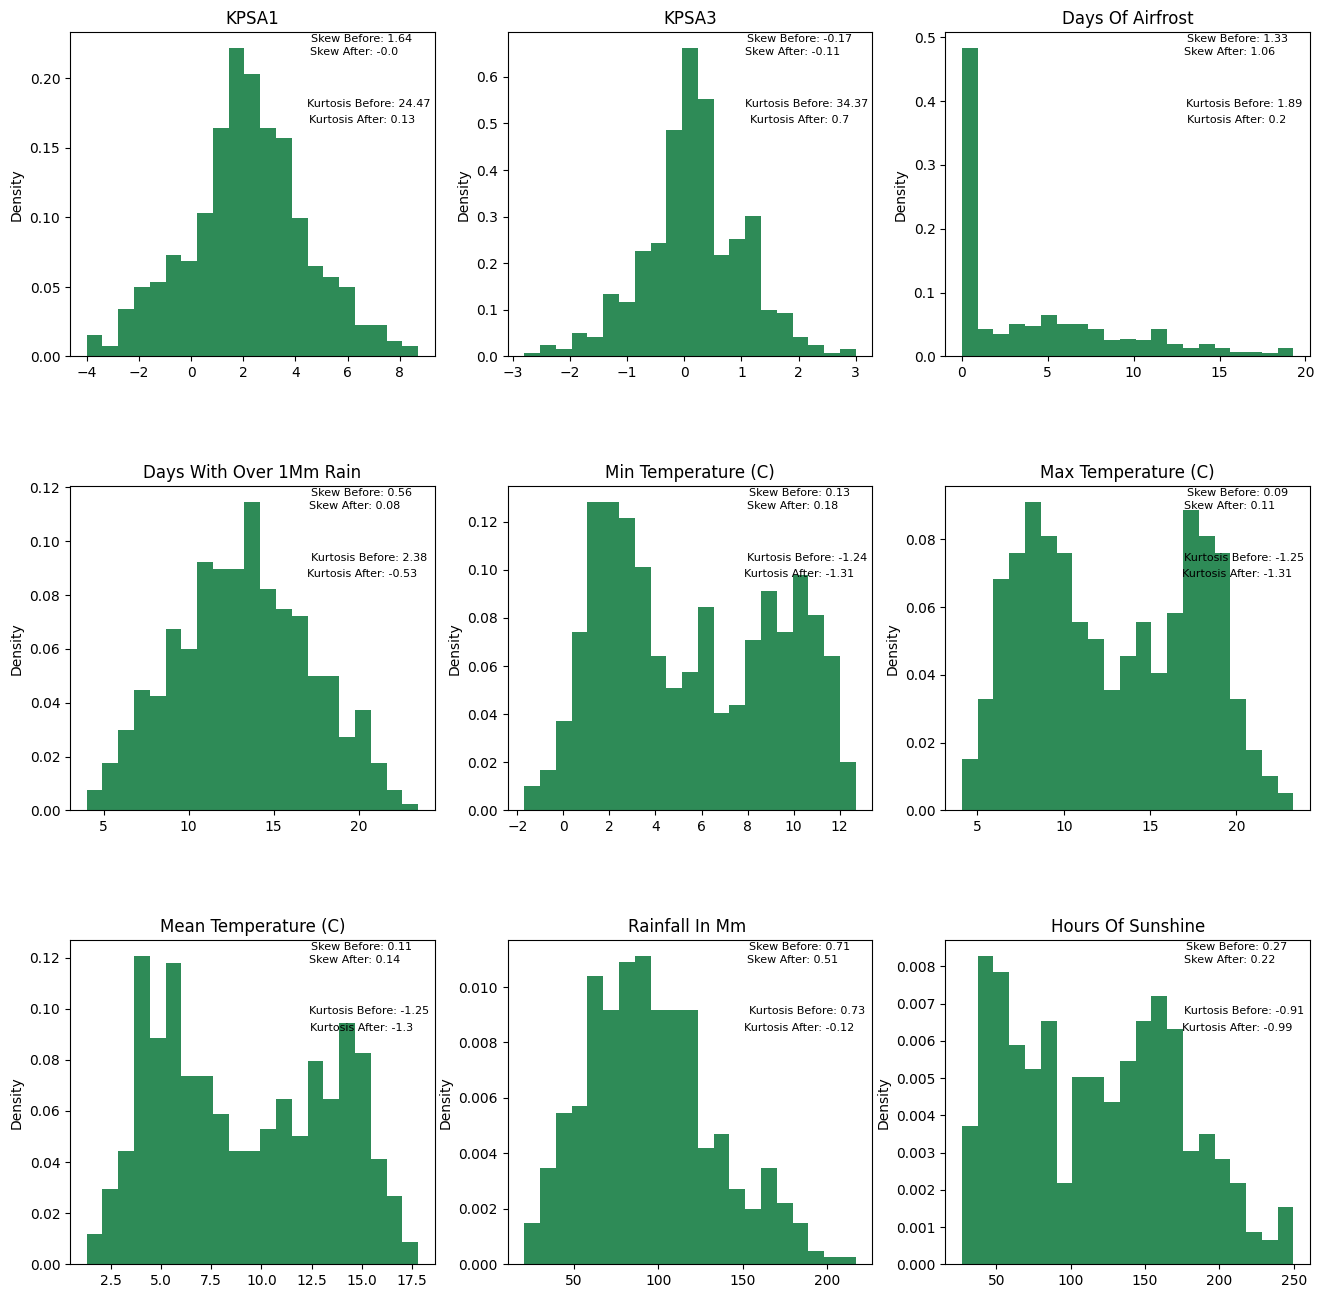

In [28]:
# Create fig and axes with matplotlib to plot histograms for all the 9 columns of time series
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 

# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
for i in range(3):
    for j in range(3):
        idx = (3 * i ) +j
        ax = axes[i, j]
        ax.hist(df_without_outliers.iloc[:, idx], bins=nr_bins, density=True, color='seagreen')
        ax.set_title(plot_titles[idx])
        ax.set_ylabel('Density')

# Calculate the skewness and kurtosis of each distribution and annotate the graph with it
for i in range(3):
    for j in range(3):
        idx = (3 * i) + j
        ax = axes[i, j]    
        # Calculate skewness for each variable
        skew_before_removing_outliers = df.iloc[:, idx].skew().round(2)
        skew_after_removing_outliers = df_without_outliers.iloc[:, idx].skew().round(2)
        # Calculate kurtosis for each column
        kurtosis_before_removing_outliers = df.iloc[:, idx].kurtosis().round(2)
        kurtosis_after_removing_outliers = df_without_outliers.iloc[:, idx].kurtosis().round(2)
        # Position the 'skew' annotation at the top-right of each plot
        skew_annotation_x1 = 0.8
        skew_annotation_y1 = 0.98
        skew_annotation_x2 = 0.78
        skew_annotation_y2 = 0.94
        # Position the 'kurtosis' annotions just underneath the skew annotation
        kurtosis_annotation_x1 = 0.82
        kurtosis_annotation_y1 = 0.78
        kurtosis_annotation_x2 = 0.80
        kurtosis_annotation_y2 = 0.73
        fontsize = 8
        ax.annotate(f"Skew Before: {skew_before_removing_outliers}", xy=(skew_annotation_x1, skew_annotation_y1), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Kurtosis Before: {kurtosis_before_removing_outliers}", xy=(kurtosis_annotation_x1, kurtosis_annotation_y1), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Skew After: {skew_after_removing_outliers}", xy=(skew_annotation_x2, skew_annotation_y2), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)
        ax.annotate(f"Kurtosis After: {kurtosis_after_removing_outliers}", xy=(kurtosis_annotation_x2, kurtosis_annotation_y2), xycoords='axes fraction', ha='center', va='center', fontsize=fontsize)

As we can see through these histogram plots, the percentage-change in sales volume indicated by KPSA1 and KPSA2 is now much closer to a normal distribution, [which can help make Linear Regression inferences and predictions more accurate](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070).

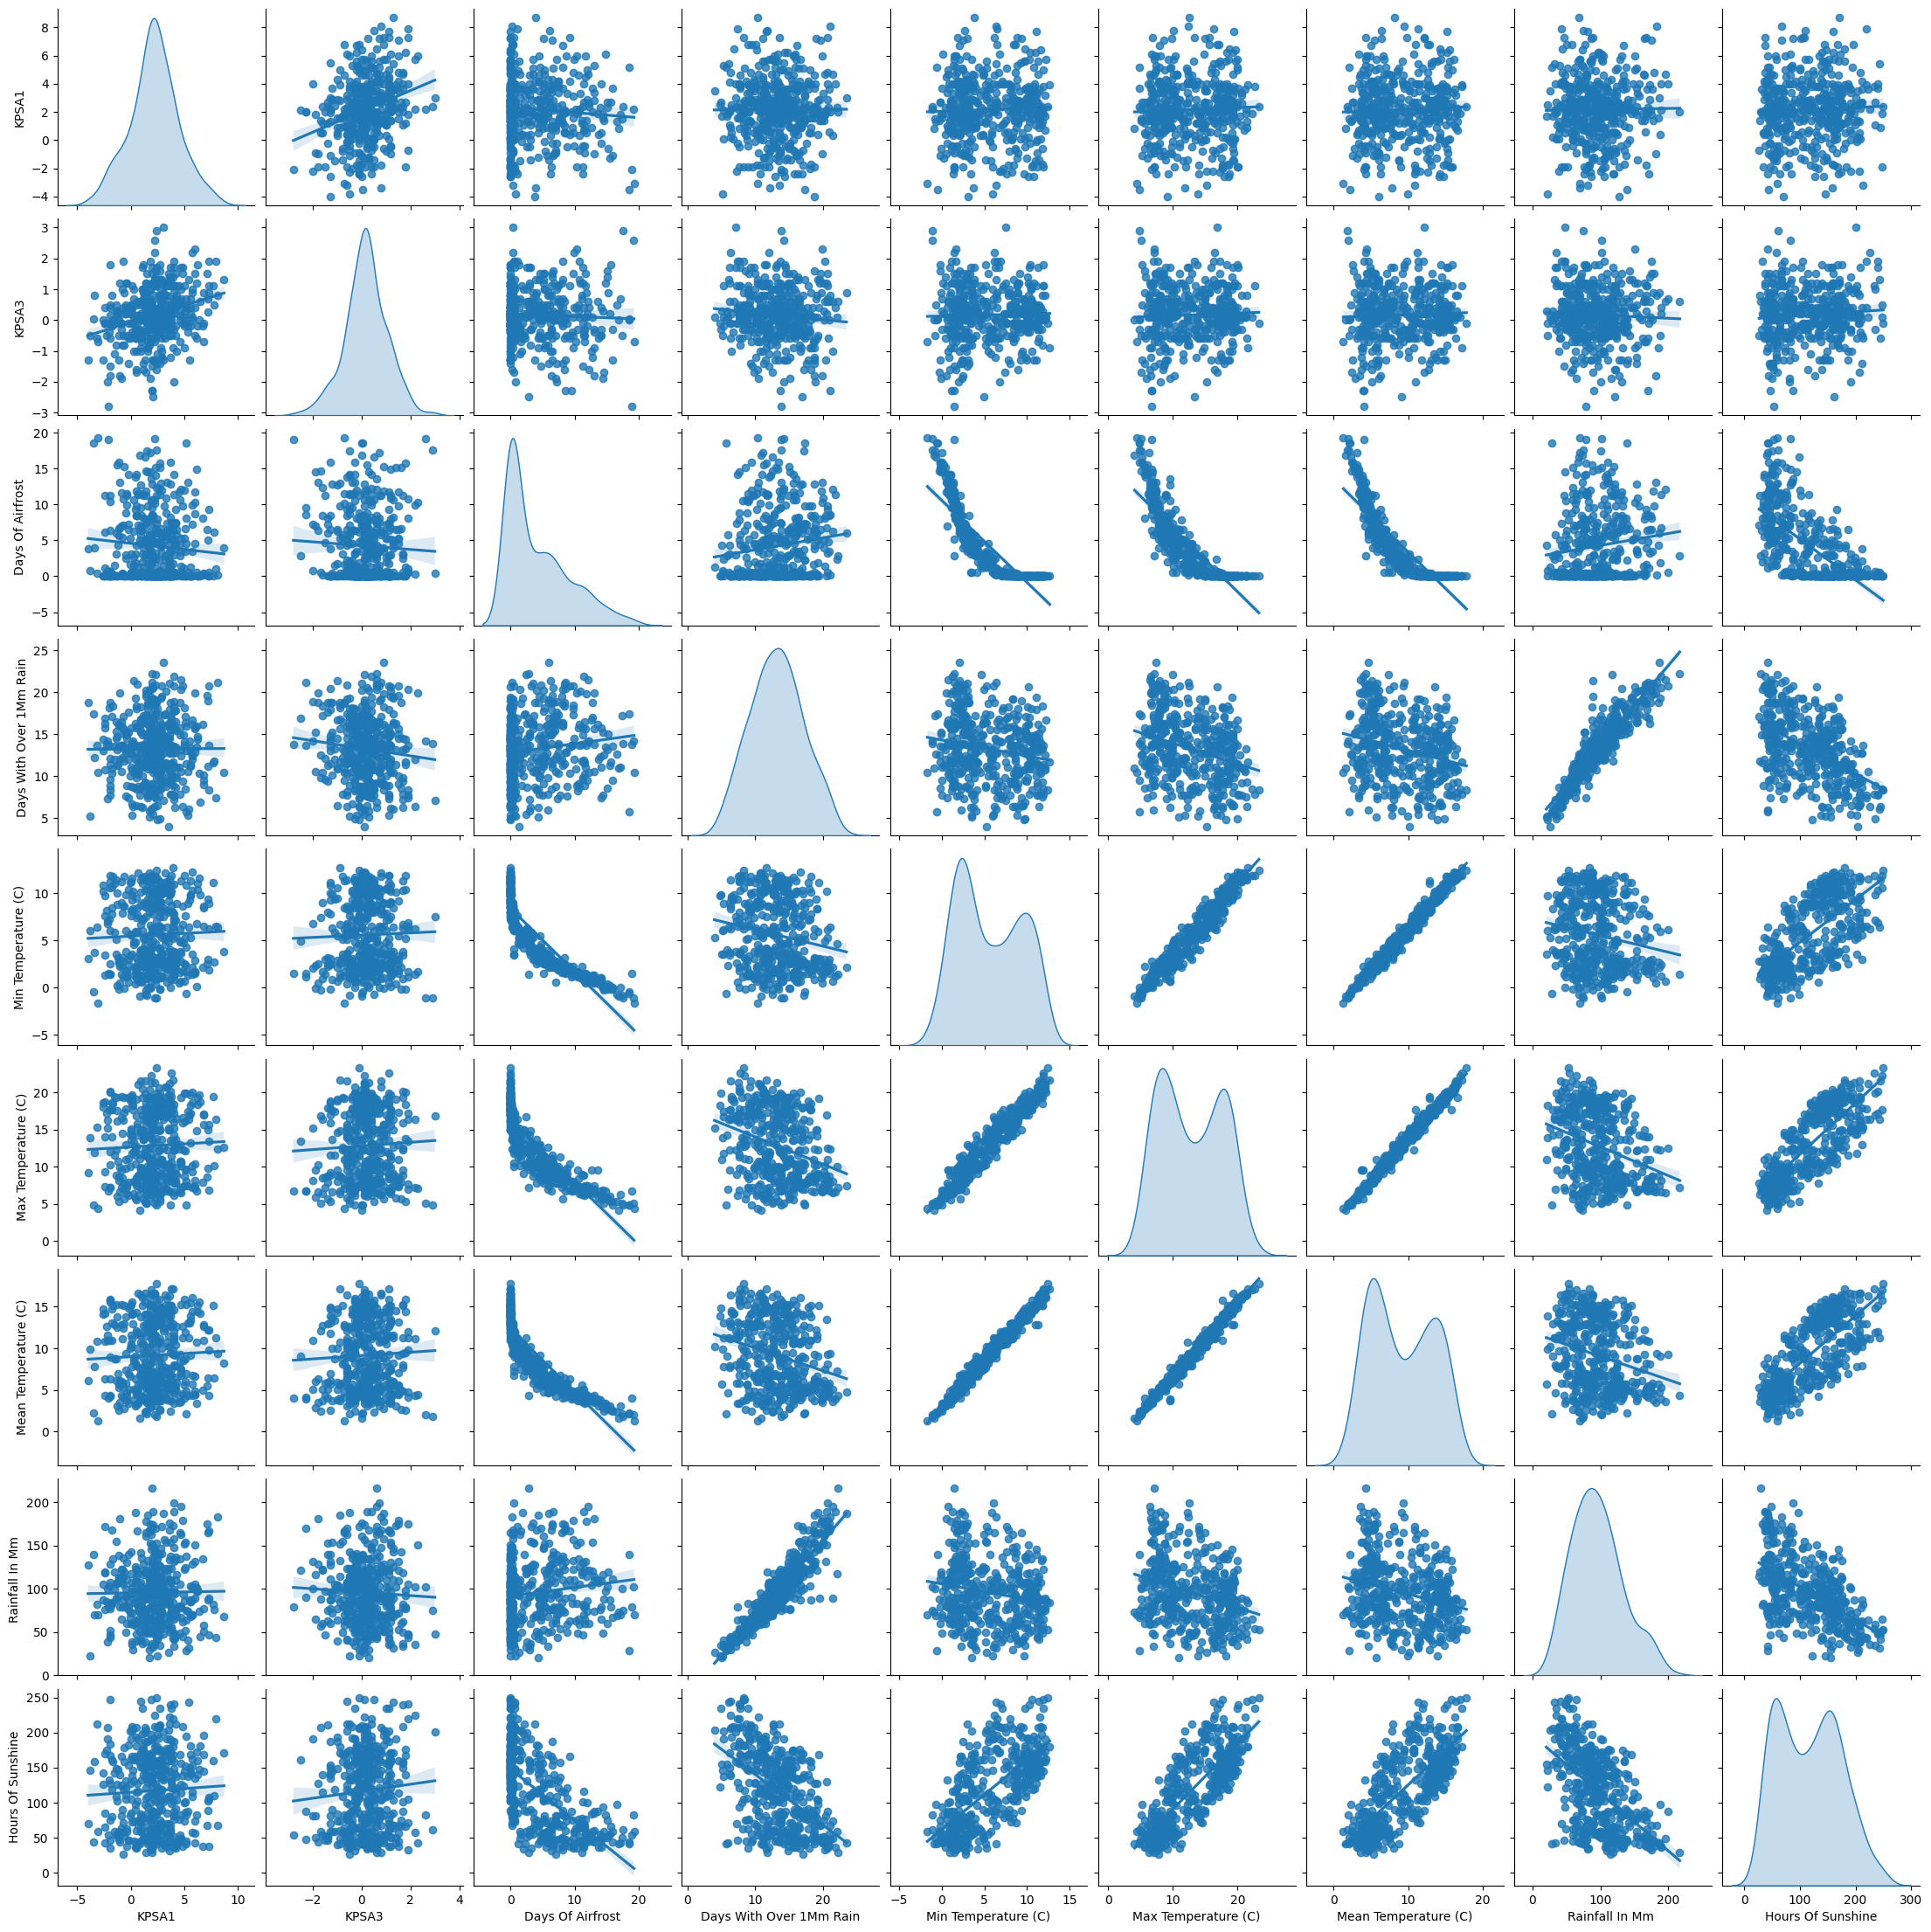

In [29]:
# Now we can look at an overview of the data using seaborn's pairplot, to get a quick glimpse of the kinds of relationships between the variables
# Add kernel-density plot instead of hist on diagonal and add regression-lines
sns.pairplot(df_without_outliers, diag_kind="kde", kind="reg") 

<Axes: >

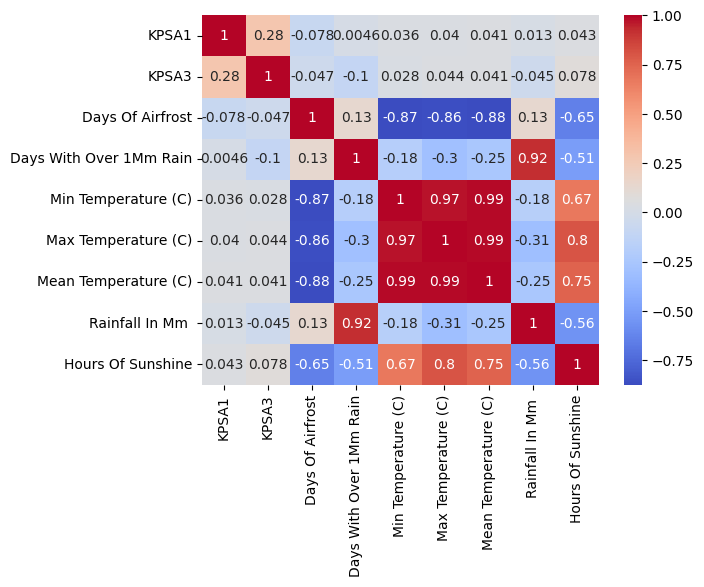

In [30]:
# We can also see the lack of linear correlations using a heatmap
# Ref: 'Machine Learning with Python: A Practical Beginner's Guide - book 2 in the Machine Learning for Beginners series', Oliver Theobald (2019, Scatterplot Press), p. 43
df_correlations = df_without_outliers.corr()
sns.heatmap(df_correlations, annot=True, cmap="coolwarm")

Unfortunately, this pairplot shows that there doesn't seem to be much correlation between the sales-volume time series and the weather datasets. However, this does not mean that there are not necessarily more complex patterns in the relationships between the weather data values and the KPSA1 and KPSA3 percentage changes when the weather features are combined together.

We could also convert the raw weather-values into percentage change since the past month, and percentage change on the same month the previous year (like KPSA3 and KPSA1 for sales), and see if this provides more information. The problem with using the pandas percentage change function on this kind of data is that variables such as 'Days of Airfrost' and 'Min Temperature' contain many *zero* values, which cannot be used to calculate percentage changes easily due to division by zero error. Consequently, we will create a new dataframe where each zero will be replaced by a small number (0.1), so that percentage change can be calculated to show difference between months and years.

In [31]:
nr_zeros = (df_without_outliers == 0).sum()
print(nr_zeros) # Here we can see that the 'Days of Airfrost' and Min Temperature variables contain some 0 values

KPSA1                        4
KPSA3                       22
Days Of Airfrost           119
Days With Over 1Mm Rain      0
Min Temperature (C)          3
Max Temperature (C)          0
Mean Temperature (C)         0
Rainfall In Mm               0
Hours Of Sunshine            0
dtype: int64


In [32]:
df_no_zeros = df_without_outliers.copy() # make a deep copy of the main dataframe

In [33]:
# Replace zeros in the airfrost column
df_no_zeros['Days Of Airfrost'] = df_no_zeros['Days Of Airfrost'].replace(0, 0.1)
# Replace zeros in the min temp column
df_no_zeros['Min Temperature (C)'] = df_no_zeros['Min Temperature (C)'].replace(0, 0.1)

In [34]:
nr_zeros_now = (df_no_zeros == 0).sum()
nr_zeros_now # No zeros in the weather data now!

KPSA1                       4
KPSA3                      22
Days Of Airfrost            0
Days With Over 1Mm Rain     0
Min Temperature (C)         0
Max Temperature (C)         0
Mean Temperature (C)        0
Rainfall In Mm              0
Hours Of Sunshine           0
dtype: int64

In [35]:
df_no_zeros

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1988-01-01     2.0   -2.3              8.60                    21.10   
1988-02-01     2.0   -2.3              9.50                    13.70   
1988-03-01     2.0    0.4              8.20                    18.50   
1988-04-01     2.0    1.5              5.20                     9.10   
1988-05-01     2.0   -0.3              0.50                    10.80   
...            ...    ...               ...                      ...   
2023-08-01    -1.4    0.5              0.10                    14.50   
2023-09-01    -1.5   -0.1              0.10                    13.50   
2023-10-01    -2.4   -0.1              1.10                    16.90   
2023-11-01    -2.4   -0.1              6.20                    16.30   
2023-12-01    -2.4   -0.1             11.25                    15.75   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01                   1.5                 6.70                  4.10   
1988-02-01                   1.1                 6.70                  3.90   
1988-03-01                   2.0                 8.20                  5.10   
1988-04-01                   3.3                11.00                  7.10   
1988-05-01                   6.0                15.00                 10.50   
...                          ...                  ...                   ...   
2023-08-01                  11.4                19.30                 15.30   
2023-09-01                  11.0                19.40                 12.85   
2023-10-01                   7.6                14.00                 10.80   
2023-11-01                   3.4                 9.30                  6.30   
2023-12-01                   1.3                 7.34                  4.31   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01             169.9               46.9  
1988-02-01              90.3               87.7  
1988-03-01             126.6               89.2  
1988-04-01              52.8              128.7  
1988-05-01              58.5              190.7  
...                      ...                ...  
2023-08-01              89.1              148.1  
2023-09-01             119.4              142.4  
2023-10-01             171.5               84.8  
2023-11-01             118.9               64.6  
2023-12-01             119.8               41.9  

[432 rows x 9 columns]

In [36]:
# Creates a new dataframe showing percentage changes on previous month instead of absolute, raw values for weather
df_percentage_changes_on_previous_month = df_no_zeros.copy()
# Pandas pct_change function tutorial: https://www.w3resource.com/pandas/series/series-pct_change.php --> have to multiply by 100 to get an actual %
df_percentage_changes_on_previous_month.iloc[:, 2:] = df_percentage_changes_on_previous_month.iloc[:, 2:].pct_change() * 100

In [37]:
df_percentage_changes_on_previous_month.head(10)

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1988-01-01     2.0   -2.3               NaN                      NaN   
1988-02-01     2.0   -2.3         10.465116               -35.071090   
1988-03-01     2.0    0.4        -13.684211                35.036496   
1988-04-01     2.0    1.5        -36.585366               -50.810811   
1988-05-01     2.0   -0.3        -90.384615                18.681319   
1988-06-01     2.0    1.2        -80.000000               -42.592593   
1988-07-01     2.0    1.2          0.000000               232.258065   
1988-08-01     2.0    0.1          0.000000               -27.184466   
1988-09-01     2.0   -0.6        100.000000               -19.333333   
1988-10-01     2.0    1.7       1150.000000                19.834711   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01                   NaN                  NaN                   NaN   
1988-02-01            -26.666667             0.000000             -4.878049   
1988-03-01             81.818182            22.388060             30.769231   
1988-04-01             65.000000            34.146341             39.215686   
1988-05-01             81.818182            36.363636             47.887324   
1988-06-01             50.000000            18.000000             26.666667   
1988-07-01             13.333333            -4.519774              1.503759   
1988-08-01             -1.960784             5.917160              2.962963   
1988-09-01            -14.000000           -12.849162            -12.949640   
1988-10-01            -26.744186           -19.871795            -22.314050   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01               NaN                NaN  
1988-02-01        -46.851089          86.993603  
1988-03-01         40.199336           1.710376  
1988-04-01        -58.293839          44.282511  
1988-05-01         10.795455          48.174048  
1988-06-01        -36.752137         -10.382800  
1988-07-01        306.756757         -23.815097  
1988-08-01        -22.259136          16.282642  
1988-09-01        -20.427350         -17.371202  
1988-10-01         27.389903         -30.215827

In [38]:
# Fill the NaN values in the top row using time-based interpolation as done before
df_percentage_changes_on_previous_month_interpolated = df_percentage_changes_on_previous_month.interpolate(
    method='time',
    limit_direction='both',
    axis=0
)
df_percentage_changes_on_previous_month_interpolated.head(15)

KPSA1  KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                            
1988-01-01     2.0   -2.3         10.465116               -35.071090   
1988-02-01     2.0   -2.3         10.465116               -35.071090   
1988-03-01     2.0    0.4        -13.684211                35.036496   
1988-04-01     2.0    1.5        -36.585366               -50.810811   
1988-05-01     2.0   -0.3        -90.384615                18.681319   
1988-06-01     2.0    1.2        -80.000000               -42.592593   
1988-07-01     2.0    1.2          0.000000               232.258065   
1988-08-01     2.0    0.1          0.000000               -27.184466   
1988-09-01     2.0   -0.6        100.000000               -19.333333   
1988-10-01     2.0    1.7       1150.000000                19.834711   
1988-11-01     2.0    0.5        324.000000               -37.241379   
1988-12-01     2.0    0.2        -81.132075                27.472527   
1989-01-01     2.0   -1.5        135.000000                 4.310345   
1989-02-01     5.2    0.7         72.340426                31.404959   
1989-03-01     5.1    0.3        -18.518519                 7.547170   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01            -26.666667             0.000000             -4.878049   
1988-02-01            -26.666667             0.000000             -4.878049   
1988-03-01             81.818182            22.388060             30.769231   
1988-04-01             65.000000            34.146341             39.215686   
1988-05-01             81.818182            36.363636             47.887324   
1988-06-01             50.000000            18.000000             26.666667   
1988-07-01             13.333333            -4.519774              1.503759   
1988-08-01             -1.960784             5.917160              2.962963   
1988-09-01            -14.000000           -12.849162            -12.949640   
1988-10-01            -26.744186           -19.871795            -22.314050   
1988-11-01            -74.603175           -32.800000            -46.808511   
1988-12-01            162.500000             8.333333             32.000000   
1989-01-01            -28.571429            -5.494505            -12.121212   
1989-02-01            -43.333333            -6.976744            -15.517241   
1989-03-01             41.176471            20.000000             22.448980   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01        -46.851089          86.993603  
1988-02-01        -46.851089          86.993603  
1988-03-01         40.199336           1.710376  
1988-04-01        -58.293839          44.282511  
1988-05-01         10.795455          48.174048  
1988-06-01        -36.752137         -10.382800  
1988-07-01        306.756757         -23.815097  
1988-08-01        -22.259136          16.282642  
1988-09-01        -20.427350         -17.371202  
1988-10-01         27.389903         -30.215827  
1988-11-01        -45.025295         -12.943872  
1988-12-01         24.539877         -56.052632  
1989-01-01         19.827586          56.287425  
1989-02-01         41.623844          57.854406  
1989-03-01         -9.651669          22.451456

In [39]:
# Scale and standardize the %-changes using z-score to make comparisons easier to make on the pairplot
# Ref: https://www.linkedin.com/advice/1/what-benefits-drawbacks-using-z-scores-standardize#:~:text=1%20Benefits%20of%20z%2Dscores,-Using%20z%2Dscores&text=Furthermore%2C%20z%2Dscores%20make%20your,relates%20to%20the%20feature's%20distribution.
# Tells us how many std-devs each value is from the mean
# Ref: https://www.statology.org/z-score-python/
# Formula: (x-value - mean)/(standard_deviation)
from scipy.stats import zscore
# Calculate z-scores for every column
df_percentage_changes_on_previous_month_interpolated_zscores = df_percentage_changes_on_previous_month_interpolated.apply(zscore)

In [62]:
df_percentage_changes_on_previous_month_interpolated_zscores.head(5)

KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                        
1988-01-01  -2.836421         -0.253886                -0.853538   
1988-02-01  -2.836421         -0.253886                -0.853538   
1988-03-01   0.267582         -0.293237                 0.486398   
1988-04-01   1.532175         -0.330555                -1.154365   
1988-05-01  -0.537160         -0.418222                 0.173808   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01             -0.161362            -0.121419             -0.276987   
1988-02-01             -0.161362            -0.121419             -0.276987   
1988-03-01              0.349396             0.751567              0.586062   
1988-04-01              0.270214             1.210063              0.790557   
1988-05-01              0.349396             1.296523              1.000504   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01         -0.835584           1.915106  
1988-02-01         -0.835584           1.915106  
1988-03-01          0.325806          -0.135919  
1988-04-01         -0.988248           0.887923  
1988-05-01         -0.066488           0.981512

In [41]:
# Now do the same for %-change on same month the previous year to correspond to KPSA1
# Change period argument to 12
df_percentage_changes_on_same_month_previous_year = df_no_zeros.copy()
# Pandas pct_change function tutorial: https://www.w3resource.com/pandas/series/series-pct_change.php
df_percentage_changes_on_same_month_previous_year.iloc[:, 2:] = df_percentage_changes_on_previous_month.iloc[:, 2:].pct_change(periods=12) * 100
#Replace and inf -inf values with np.nan
df_percentage_changes_on_same_month_previous_year = df_percentage_changes_on_same_month_previous_year.replace([np.inf, -np.inf], np.nan)

# Interpolate for the first year
df_percentage_changes_on_same_month_previous_year_interpolated = df_percentage_changes_on_same_month_previous_year.interpolate(
    method='time',
    limit_direction='both',
    axis=0
)

df_percentage_changes_on_same_month_previous_year_interpolated_zscores = df_percentage_changes_on_same_month_previous_year_interpolated.apply(zscore)
df_percentage_changes_on_same_month_previous_year_interpolated_zscores.head(20)

KPSA1     KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                                  
1988-01-01  -0.072658 -2.836421          0.575570                 0.004312   
1988-02-01  -0.072658 -2.836421          0.575570                 0.004312   
1988-03-01  -0.072658  0.267582          0.575570                 0.004312   
1988-04-01  -0.072658  1.532175          0.575570                 0.004312   
1988-05-01  -0.072658 -0.537160          0.575570                 0.004312   
1988-06-01  -0.072658  1.187286          0.575570                 0.004312   
1988-07-01  -0.072658  1.187286          0.575570                 0.004312   
1988-08-01  -0.072658 -0.077307          0.575570                 0.004312   
1988-09-01  -0.072658 -0.882049          0.575570                 0.004312   
1988-10-01  -0.072658  1.762102          0.575570                 0.004312   
1988-11-01  -0.072658  0.382545          0.575570                 0.004312   
1988-12-01  -0.072658  0.037656          0.575570                 0.004312   
1989-01-01  -0.072658 -1.916716          0.575570                 0.004312   
1989-02-01   1.338055  0.612471          0.575570                 0.004312   
1989-03-01   1.293970  0.152619          0.109495                 0.093584   
1989-04-01   0.720868  0.037656         -0.035209                 0.107720   
1989-05-01   1.426224  1.302249          0.081376                -0.162362   
1989-06-01   0.235935 -1.801753          0.083371                -0.025797   
1989-07-01  -0.557591 -0.882049          0.082232                 0.065231   
1989-08-01  -0.160828  0.957360          0.081054                -0.228581   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01             -0.013683             0.069502              0.157602   
1988-02-01             -0.013683             0.069502              0.157602   
1988-03-01             -0.013683             0.069502              0.157602   
1988-04-01             -0.013683             0.069502              0.157602   
1988-05-01             -0.013683             0.069502              0.157602   
1988-06-01             -0.013683             0.069502              0.157602   
1988-07-01             -0.013683             0.069502              0.157602   
1988-08-01             -0.013683             0.069502              0.157602   
1988-09-01             -0.013683             0.069502              0.157602   
1988-10-01             -0.013683             0.069502              0.157602   
1988-11-01             -0.013683             0.069502              0.157602   
1988-12-01             -0.013683             0.069502              0.157602   
1989-01-01             -0.013683             0.069502              0.157602   
1989-02-01             -0.013683             0.069502              0.157602   
1989-03-01             -0.085960             0.069502              0.028596   
1989-04-01             -0.139039            -0.087343             -0.020982   
1989-05-01              0.068130             0.259341              0.106088   
1989-06-01             -0.086170             0.015745              0.018143   
1989-07-01              0.086994            -0.755852              0.939690   
1989-08-01              0.141042            -0.347765             -0.183076   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01          0.001173           0.079482  
1988-02-01          0.001173           0.079482  
1988-03-01          0.001173           0.079482  
1988-04-01          0.001173           0.079482  
1988-05-01          0.001173           0.079482  
1988-06-01          0.001173           0.079482  
1988-07-01          0.001173           0.079482  
1988-08-01          0.001173           0.079482  
1988-09-01          0.001173           0.079482  
1988-10-01

In [42]:
# Now run the seaborn pairplot relationship-overview function again for the percentage-changes-since-last-month for KPSA3 
# and percentage-changes-since-month-a-year-earlier for KPSA1

# Drop KPSA1 column for %-changes on previous month column, as KPSA1 only refelects the %-changes on same month the previous year
df_percentage_changes_on_previous_month_interpolated_zscores = df_percentage_changes_on_previous_month_interpolated_zscores.iloc[:, 1:]
df_percentage_changes_on_previous_month_interpolated_zscores

KPSA3  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                        
1988-01-01  -2.836421         -0.253886                -0.853538   
1988-02-01  -2.836421         -0.253886                -0.853538   
1988-03-01   0.267582         -0.293237                 0.486398   
1988-04-01   1.532175         -0.330555                -1.154365   
1988-05-01  -0.537160         -0.418222                 0.173808   
...               ...               ...                      ...   
2023-08-01   0.382545         -0.270939                -0.546272   
2023-09-01  -0.307233         -0.270939                -0.315051   
2023-10-01  -0.307233          1.358575                 0.298114   
2023-11-01  -0.307233          0.484563                -0.251095   
2023-12-01  -0.307233         -0.138212                -0.247730   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
1988-01-01             -0.161362            -0.121419             -0.276987   
1988-02-01             -0.161362            -0.121419             -0.276987   
1988-03-01              0.349396             0.751567              0.586062   
1988-04-01              0.270214             1.210063              0.790557   
1988-05-01              0.349396             1.296523              1.000504   
...                          ...                  ...                   ...   
2023-08-01             -0.023088            -0.017714             -0.093890   
2023-09-01             -0.052333            -0.101216             -0.546574   
2023-10-01             -0.181336            -1.206803             -0.545127   
2023-11-01             -0.295998            -1.430484             -1.167668   
2023-12-01             -0.326608            -0.943216             -0.923638   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01         -0.835584           1.915106  
1988-02-01         -0.835584           1.915106  
1988-03-01          0.325806          -0.135919  
1988-04-01         -0.988248           0.887923  
1988-05-01         -0.066488           0.981512  
...                      ...                ...  
2023-08-01         -0.696184          -0.043349  
2023-09-01          0.243187          -0.269613  
2023-10-01          0.371641          -1.149844  
2023-11-01         -0.619710          -0.749932  
2023-12-01         -0.200417          -1.022138  

[432 rows x 8 columns]

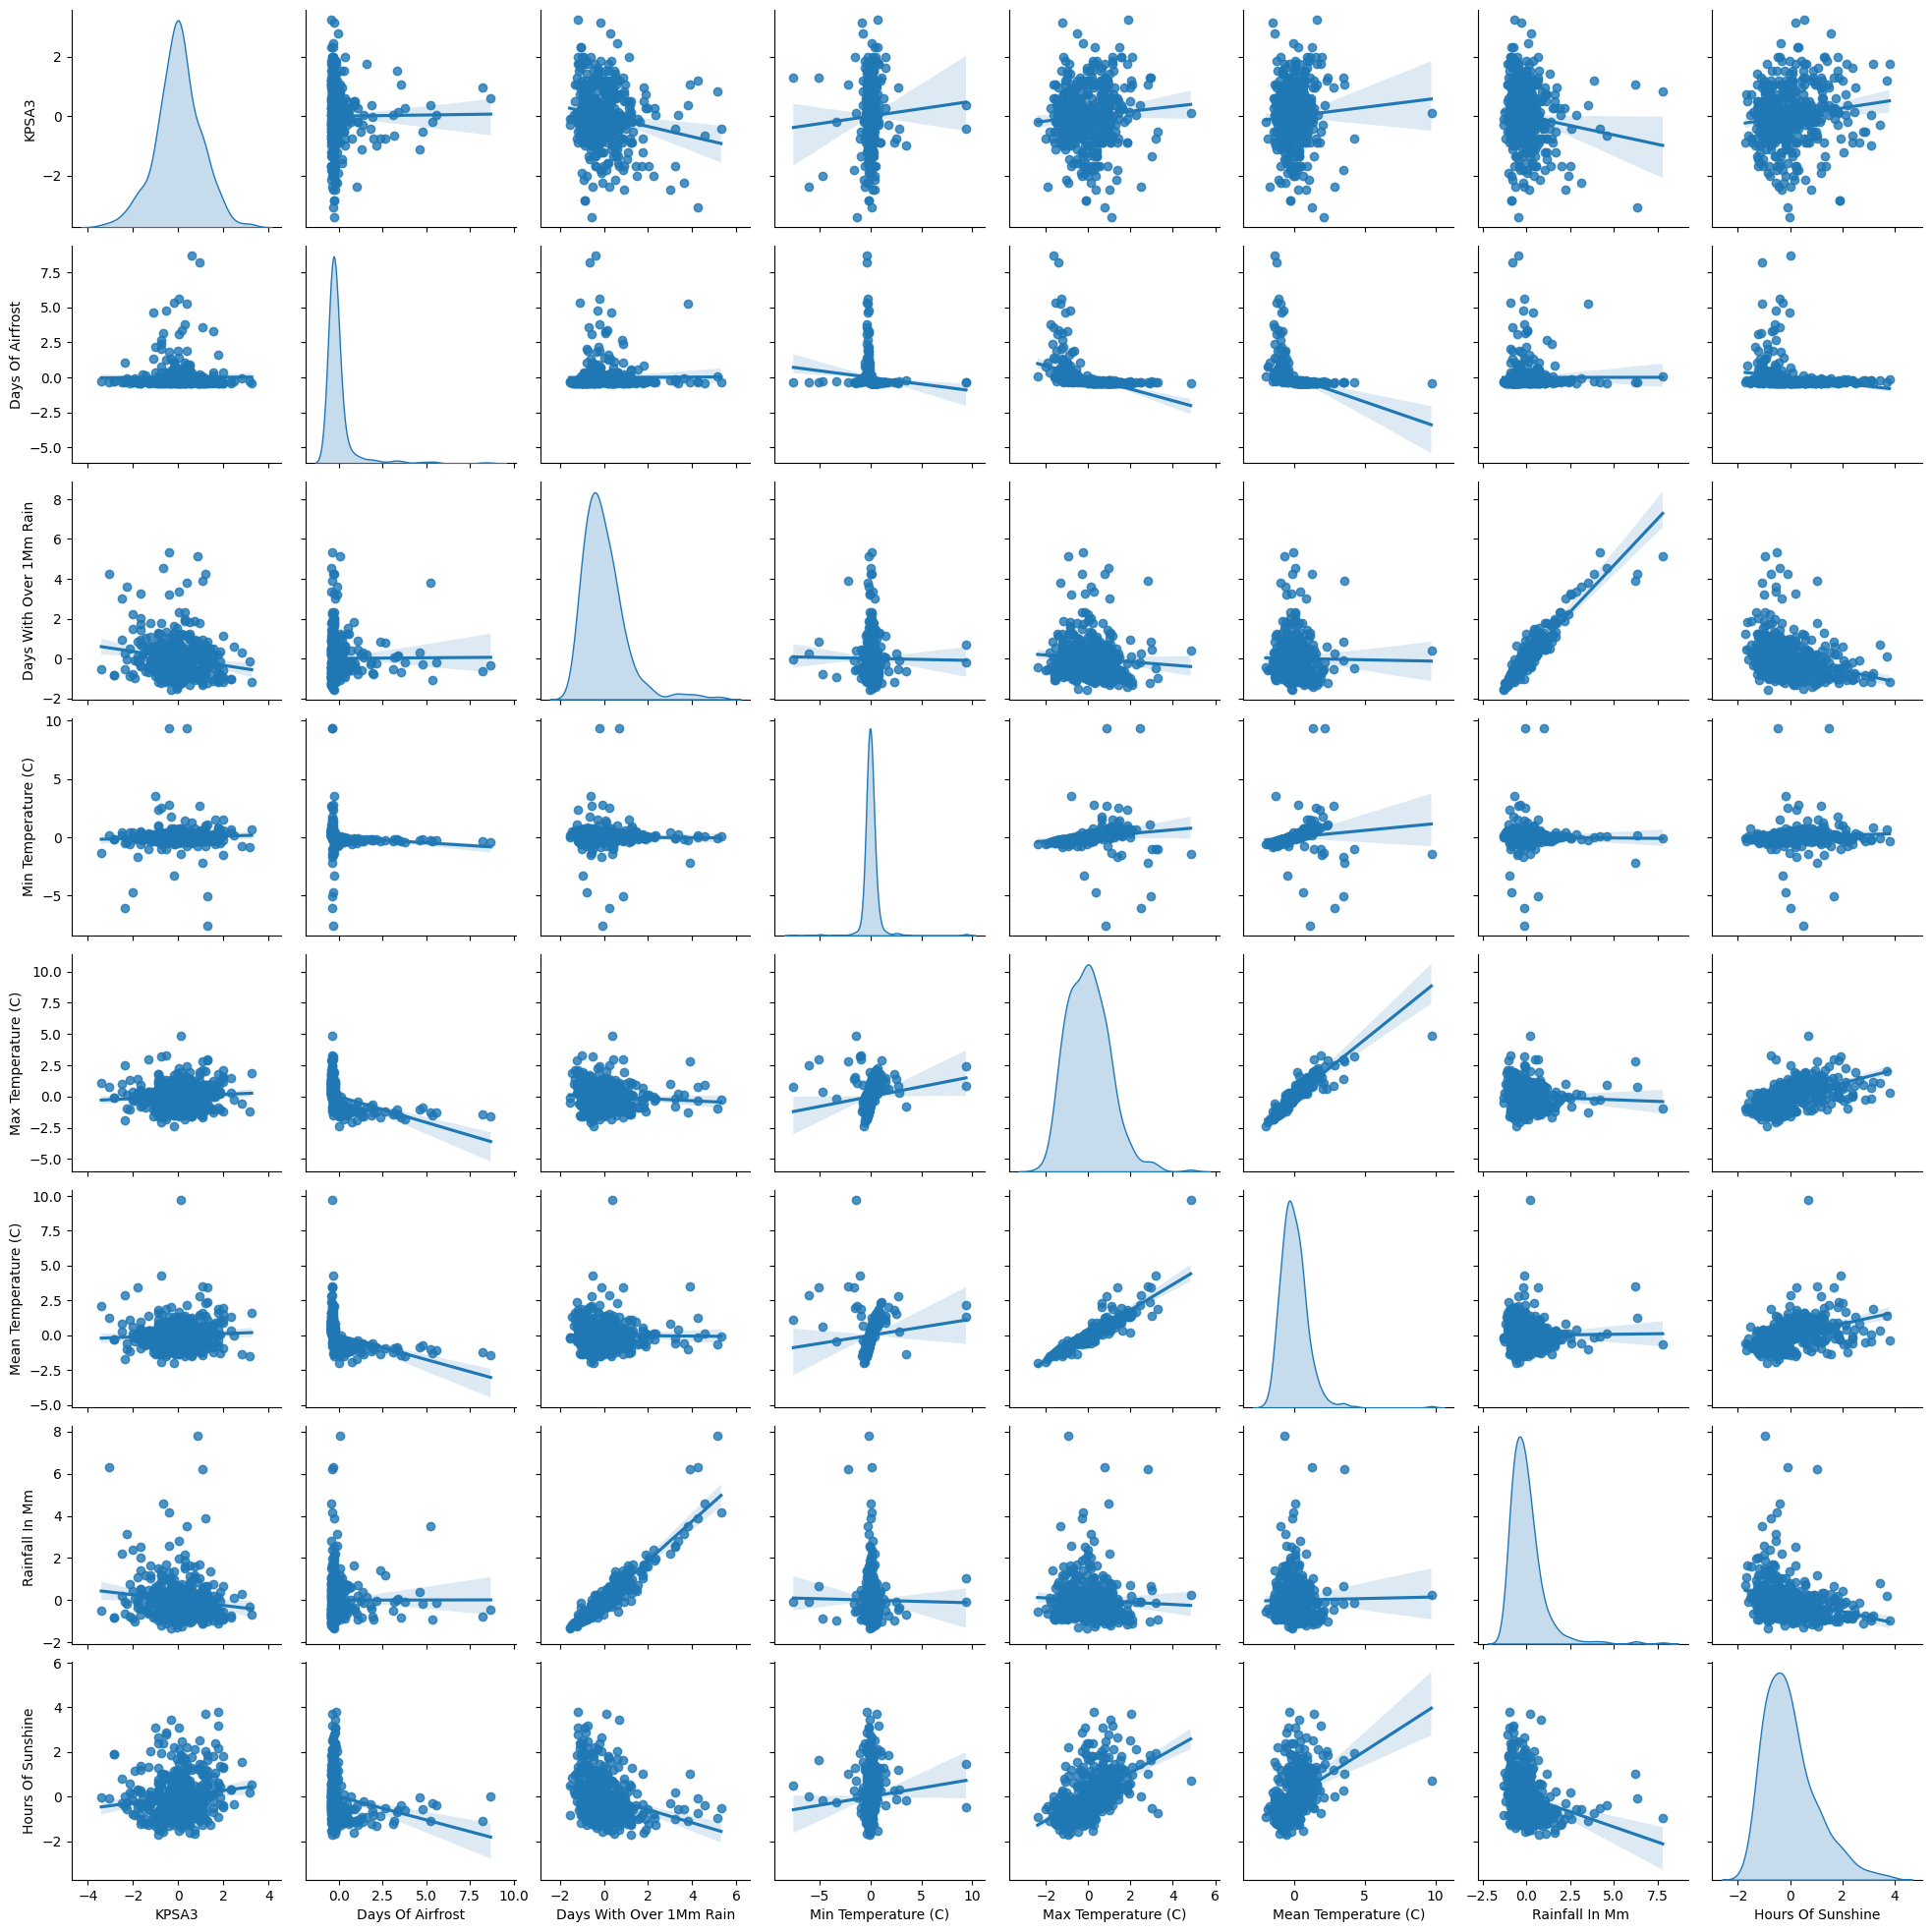

In [43]:
sns.pairplot(data=df_percentage_changes_on_previous_month_interpolated_zscores, diag_kind='kde', kind='reg')

<Axes: >

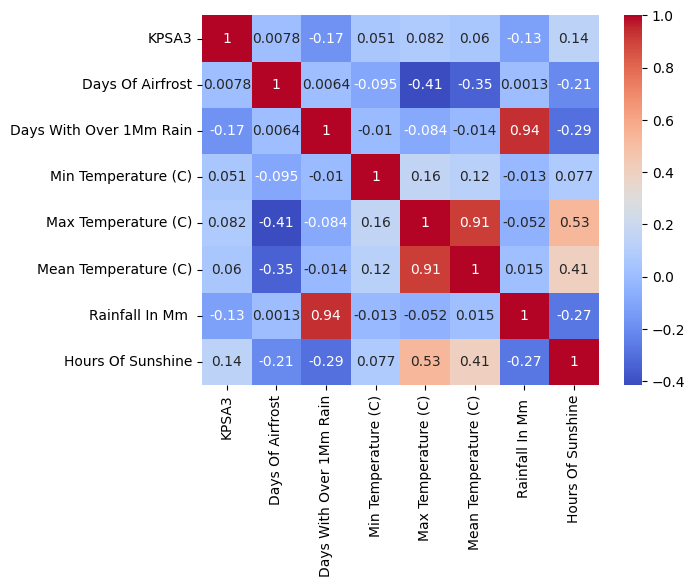

In [44]:
# We will also run another heatmap to compare correlations for KPSA3 and %-changes on prev month for the weather variables
df_percentage_changes_on_previous_month_interpolated_zscores_correlations = df_percentage_changes_on_previous_month_interpolated_zscores.corr()
sns.heatmap(df_percentage_changes_on_previous_month_interpolated_zscores_correlations, annot=True, cmap="coolwarm")

This heatmap still shows relatively little correlation between KPSA3 and the other weather variables, but more than the previous heatmap. For instance, there is (albeit a very weak) negative correlation between KPSA3 and the percentage-change in rainfall from the previous month, as the correlation value between KPSA3 %-change and 'Days with over 1mm Rain'-%change is -0.17 and -0.13 for %-change in rainfall in mm. There is also a weak positive correlation (0.14) between KPSA3 and 'Hours of Sunshine'. While these patterns seem very weak, fortunately they are what would be expected in terms of shopping behaviour. Combining the weather variables in a features matrix for polynomial regression might be able to shed light on more complex patterns.

In [45]:
# Drop the KPSA3 column for df_percentage_changes_on_same_month_previous_year, as %-change compared to prev year is only consistent with KPSA1
df_percentage_changes_on_same_month_previous_year_interpolated_zscores.drop('KPSA3', axis=1, inplace=True)

In [46]:
df_percentage_changes_on_same_month_previous_year_interpolated_zscores.tail(20)

KPSA1  Days Of Airfrost  Days With Over 1Mm Rain  \
Time Period                                                        
2022-05-01  -0.028573          0.227269                 0.105662   
2022-06-01   0.125723         -0.003960                 0.113999   
2022-07-01   0.015511         -0.003960                 0.035584   
2022-08-01   0.037554         -0.003960                -0.005619   
2022-09-01   0.125723         -0.003960                 0.729213   
2022-10-01  -0.006531         -0.003960                 0.138893   
2022-11-01  -0.138785          0.085866                 0.084376   
2022-12-01  -0.160828          1.165938                 0.043568   
2023-01-01   0.015511         -0.054282                 0.063358   
2023-02-01   0.081638          0.051494                 0.011289   
2023-03-01  -0.094701          0.062442                -0.195624   
2023-04-01  -2.453237          0.479997                 0.468515   
2023-05-01  -1.924219          0.079161                 0.038128   
2023-06-01  -1.791965          0.069523                 0.036643   
2023-07-01   0.015511          0.060195                -0.257060   
2023-08-01  -1.571541          0.050557                -0.152691   
2023-09-01  -1.615626          0.040919                 0.067747   
2023-10-01  -2.012389          0.031591                 0.120800   
2023-11-01  -2.012389          0.021953                 0.167572   
2023-12-01  -2.012389          0.004509                 0.091107   

             Min Temperature (C)  Max Temperature (C)  Mean Temperature (C)  \
Time Period                                                                   
2022-05-01              0.089777             0.107900              0.030501   
2022-06-01             -0.106822            -0.002173              0.006912   
2022-07-01             -0.040799             0.106223              0.048442   
2022-08-01             -0.105173             0.070618             -0.013108   
2022-09-01              0.220721             0.889556              0.497428   
2022-10-01             -0.090567             0.021249              0.017547   
2022-11-01             -0.073770             0.073109              0.033310   
2022-12-01              0.100296             0.265556              0.130257   
2023-01-01              2.505804            -2.927542             -0.250240   
2023-02-01             -0.017978             0.208499              0.077643   
2023-03-01             -0.056432            -0.074715             -0.014418   
2023-04-01             -0.051493             0.316820              0.082987   
2023-05-01             -0.071611             0.144629              0.046327   
2023-06-01              0.066234             0.015736              0.097265   
2023-07-01             -0.107632            -0.002360             -0.025825   
2023-08-01             -0.221132            -0.112247              0.223304   
2023-09-01             -0.106466            -0.076623              0.033915   
2023-10-01              0.051802             0.230769              0.052700   
2023-11-01             -0.012835             0.124680              0.065011   
2023-12-01             -0.079301             0.002478              0.015919   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
2022-05-01          0.028898          -0.175359  
2022-06-01          0.034649           0.229879  
2022-07-01          0.016758          -0.138922  
2022-08-01          0.006887          -0.026984  
2022-09-01          0.146315           0.629123  
2022-10-01          0.036469           0.051291  
2022-11-01          0.018646           0.178176  
2022-12-01          0.005431           0.035415  
2023-01-01          0.020607           0.036707  
2023-02-01          0.012867           0.081011  
2023-03-01         -0.059206           0.029512  
2023-04-01          0.760334           6.362386  
2023-05-01          0.003877          -0.326426  
2023-06-01         -0.020008  

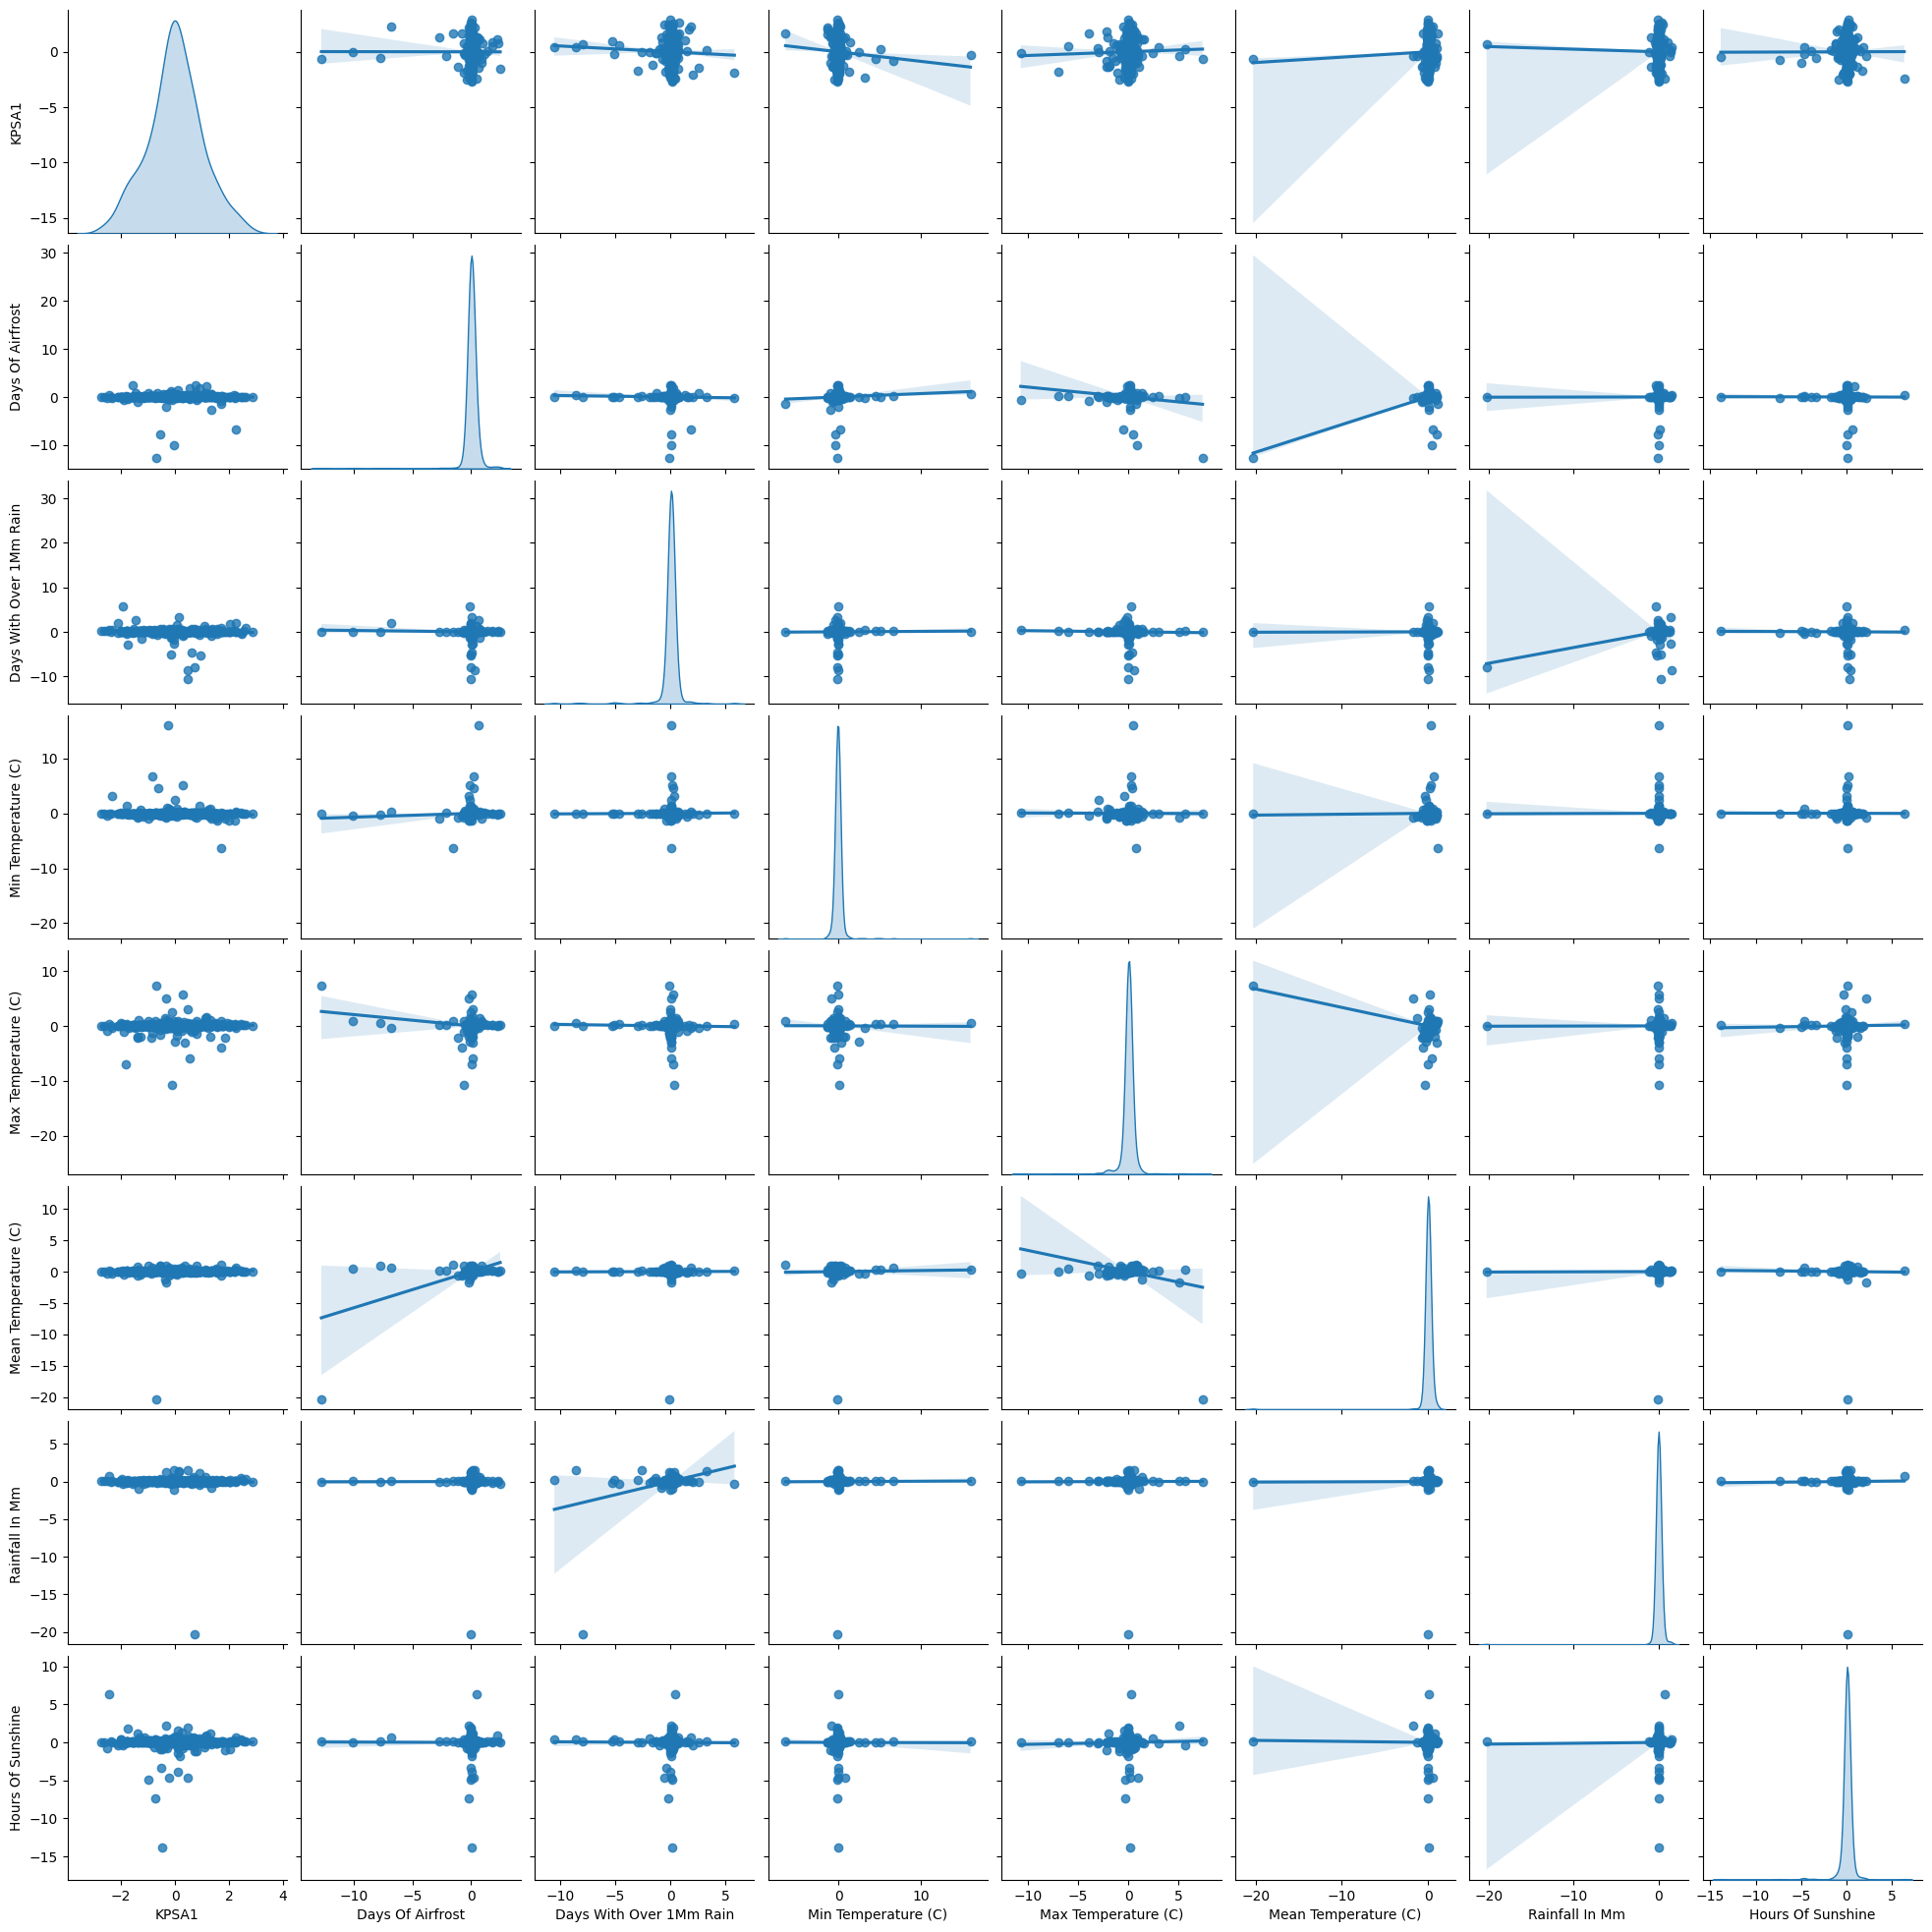

In [47]:
# Create the pairplot
sns.pairplot(df_percentage_changes_on_same_month_previous_year_interpolated_zscores, diag_kind='kde', kind='reg')

Unfortunately, this analysis using seaborn's pairplots demonstrates that there appears to be very little correlation between the KPSA1 and KPSA3 sales volume percentage-change variables and the weather variables. This can be seen using visualization more easily than using numbers and a table, as the distribution of the points on the plots can be characterized as straight horizontal or vertical lines, rather than a 45 degree line, indicating there is little to no correlation between the variables, except for some weak correlation between KPSA3 and hours of sunshine per month. However, even though there is no linear relationship or correlation between the variables, it might be the case that a more complex regression model using polynomial features could capture some relationships between the variables.

<Axes: >

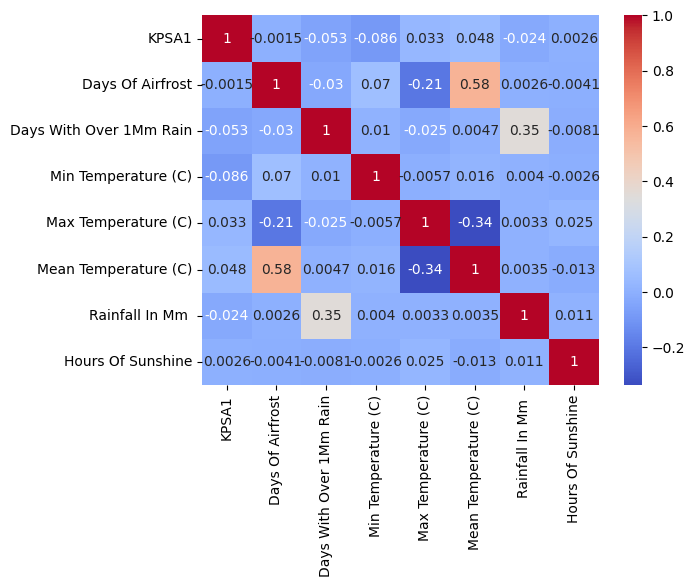

In [48]:
df_percentage_changes_on_same_month_previous_year_interpolated_zscores_correlations = df_percentage_changes_on_same_month_previous_year_interpolated_zscores.corr()
sns.heatmap(df_percentage_changes_on_same_month_previous_year_interpolated_zscores_correlations, annot=True, cmap="coolwarm")

This heatmap also indicates how little correlation (even less than for the KPSA3 heat map) there is between KPSA1 (%-change on the same month a previous year) and the corresponding %-changes for the weather variables. Consequently, the pairplot and heatamap visualizations used in this project was helpful in showing how little correlation there was between KPSA1/KPSA3 and the weather variables, except for a weak correlation between rainfall, sunshine and KPSA3. This would have been difficult to grasp quickly without using these plots, as reading through a correlations-table entry-by-entry would take more time and increased cognitive load. The visualizations use shape and colour to quickly evoke the lack of correlation between the variables. As a result, one may conclude that if there are any patterns or relationships between the weather and the sales-volume changes as measured by KPAS1 and KPSA3, these relationships are complex and more difficult to extract than simple linear correlations. Furthermore, the first heatmap and pairplot used on the dataset before scaling and percentage-change calculation shows that there is a very strong positive correlation (dark-red values close to 1 on the heatmap) between the three ways of representing monthly temperature (mean, min and max temperature), which is to be expected, as a high max-temperature value for a month probably reflects a high mean-temperature. As stated by Oliver Theobald in the 2019 'Machine Learning with Python' book, this represents a problem called *collinearity* (p. 102) where individual independent variables are correlated with each other so strongly that 'they are not considered unique', and introduce redundancy into the model. Consequently, only the *mean* temperature for the month will be included in the regression features matrix, in order to reduce the redundancy among temperature variables.

## Creating the Features Matrix and Target Arrays for KPSA1 and KPSA3

In [75]:
# For KPSA1:
# Features matrix (x) --> weather features, %-change on same month the previous year
# Extract all weather columns except min and max temp to reduce multicollinearity
X_kpsa1 = df_percentage_changes_on_same_month_previous_year_interpolated_zscores.iloc[:, [1, 2, 5, 6, 7]] 
# Target vector (y) --> KPSA1 %-change in retail sales volume on same month the previous year, labels
y_kpsa1 =  df_percentage_changes_on_same_month_previous_year_interpolated_zscores['KPSA1']
X_kpsa1

Days Of Airfrost  Days With Over 1Mm Rain  Mean Temperature (C)  \
Time Period                                                                    
1988-01-01           0.575570                 0.004312              0.157602   
1988-02-01           0.575570                 0.004312              0.157602   
1988-03-01           0.575570                 0.004312              0.157602   
1988-04-01           0.575570                 0.004312              0.157602   
1988-05-01           0.575570                 0.004312              0.157602   
...                       ...                      ...                   ...   
2023-08-01           0.050557                -0.152691              0.223304   
2023-09-01           0.040919                 0.067747              0.033915   
2023-10-01           0.031591                 0.120800              0.052700   
2023-11-01           0.021953                 0.167572              0.065011   
2023-12-01           0.004509                 0.091107              0.015919   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01          0.001173           0.079482  
1988-02-01          0.001173           0.079482  
1988-03-01          0.001173           0.079482  
1988-04-01          0.001173           0.079482  
1988-05-01          0.001173           0.079482  
...                      ...                ...  
2023-08-01         -0.113545           0.049864  
2023-09-01          0.034922           0.026151  
2023-10-01          0.055789           0.337584  
2023-11-01         -0.037789           0.064362  
2023-12-01          0.025075           0.337573  

[432 rows x 5 columns]

In [78]:
# For KPSA3:
# Features matrix (x)  --> weather features, %-change on previous month
# Extract all weather columns except min and max temp to reduce multicollinearity
X_kpsa3 = df_percentage_changes_on_previous_month_interpolated_zscores.iloc[:, [1, 2, 5, 6, 7]] 
# Target vector (y) --> KPSA3 %-change in retail sales on previous month, labels
y_kpsa3 = df_percentage_changes_on_previous_month_interpolated_zscores['KPSA3']
X_kpsa3

Days Of Airfrost  Days With Over 1Mm Rain  Mean Temperature (C)  \
Time Period                                                                    
1988-01-01          -0.253886                -0.853538             -0.276987   
1988-02-01          -0.253886                -0.853538             -0.276987   
1988-03-01          -0.293237                 0.486398              0.586062   
1988-04-01          -0.330555                -1.154365              0.790557   
1988-05-01          -0.418222                 0.173808              1.000504   
...                       ...                      ...                   ...   
2023-08-01          -0.270939                -0.546272             -0.093890   
2023-09-01          -0.270939                -0.315051             -0.546574   
2023-10-01           1.358575                 0.298114             -0.545127   
2023-11-01           0.484563                -0.251095             -1.167668   
2023-12-01          -0.138212                -0.247730             -0.923638   

             Rainfall In Mm   Hours Of Sunshine  
Time Period                                      
1988-01-01         -0.835584           1.915106  
1988-02-01         -0.835584           1.915106  
1988-03-01          0.325806          -0.135919  
1988-04-01         -0.988248           0.887923  
1988-05-01         -0.066488           0.981512  
...                      ...                ...  
2023-08-01         -0.696184          -0.043349  
2023-09-01          0.243187          -0.269613  
2023-10-01          0.371641          -1.149844  
2023-11-01         -0.619710          -0.749932  
2023-12-01         -0.200417          -1.022138  

[432 rows x 5 columns]

In [89]:
# PCA for meaningful visualization
# Reduce nr of dimensions, but retains essential features of the data
# Makes it easier to visualize the structure of the data

# a. PCA for KPSA1
from sklearn.decomposition import PCA # 1. import the PCA model
# 2. instantiate the PCA model to reduce features matrix for KPSA1 from 5 to 2 dimensions
model1 = PCA(n_components=2)
model1.fit(X_kpsa1) # 3. Fit to data
X_kpsa1_2D = model1.transform(X_kpsa1) # 4. Transform into 2D
# 5. This is now in format of a 2D numpy array. Transform back into pd DataFrame
X_kpsa1_2D_df = pd.DataFrame(X_kpsa1_2D, columns=['Principal Component 1', 'Principal Component 2'], index=X_kpsa1.index)
X_kpsa1_2D_df.tail(5)

Principal Component 1  Principal Component 2
Time Period                                              
2023-08-01               -0.200795               0.177147
2023-09-01               -0.048797              -0.074796
2023-10-01               -0.046258              -0.128961
2023-11-01               -0.053690              -0.095083
2023-12-01               -0.002987              -0.084218

In [94]:
# b. PCA for KPSA3
# 1. Instantiate the PCA model to reduce features matrix for KPSA1 from 5 to 2 dimensions
model2 = PCA(n_components=2)
# 2. Fit to data
model1.fit(X_kpsa3) 
# 3. Transform from 5 into 2D
X_kpsa3_2D = model1.transform(X_kpsa3) 
# 4s. This is now in format of a 2D numpy array. Transform back into pd DataFrame
X_kpsa3_2D_df = pd.DataFrame(X_kpsa3_2D, columns=['Principal Component 1', 'Principal Component 2'], index=X_kpsa3.index)
X_kpsa3_2D_df.tail(5)

Principal Component 1  Principal Component 2
Time Period                                              
2023-08-01               -0.775337              -0.283648
2023-09-01                0.130653              -0.316025
2023-10-01                1.182941              -1.329681
2023-11-01                0.058370              -1.537415
2023-12-01                0.297531              -1.026126

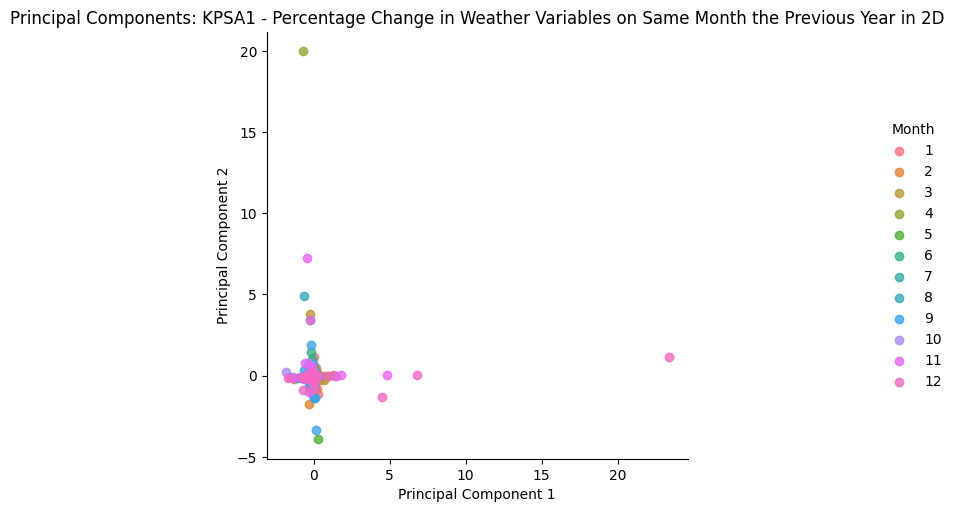

In [101]:
# Plot KPSA1 principal components, coloring using hue by month

# Create a new Month column for each PCA df based on the index time series' month component, in order to use this as the 'hue' argument in seaborn plot
X_kpsa1_2D_df['Month'] = X_kpsa1_2D_df.index.month
X_kpsa3_2D_df['Month'] = X_kpsa3_2D_df.index.month

sns.lmplot(x='Principal Component 1', y='Principal Component 2', hue='Month', data=X_kpsa1_2D_df, fit_reg=False)
plt.title('Principal Components: KPSA1 - Percentage Change in Weather Variables on Same Month the Previous Year in 2D')
plt.show()

In this visualization, the points are all clustered on top of each other following the dimensionality reduction using principal component analysis (PCA). This suggests that there is not a lot of signficant variation between the features, as there are no discernible separate groups or clusters. As such, this might point to the fact that there is multicollinearity, meaning [features that are depend on each other](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf) in the dataset. This can lead to problems with regression, such as not being able to know how important each feature is for predicting the dependent variable (sales volume). We will now visualize the results of PCA for KPA3 (percentage change on previous month data) to see if the results were more meaningful.

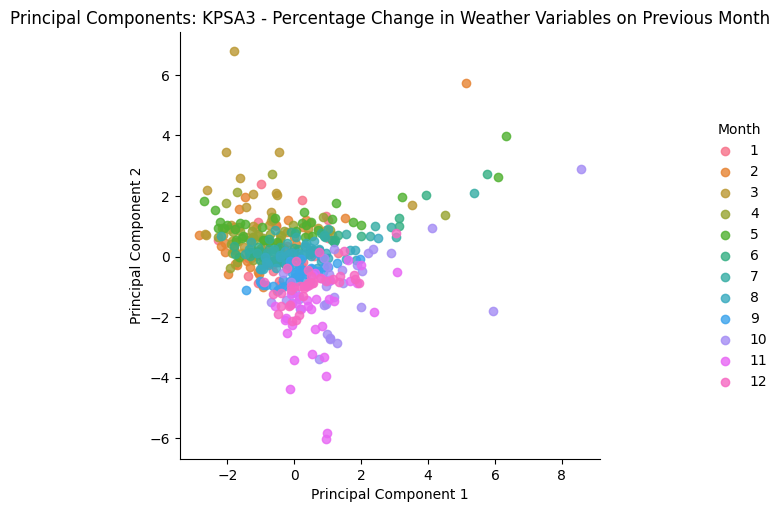

In [105]:
sns.lmplot(x='Principal Component 1', y='Principal Component 2', hue='Month', data=X_kpsa3_2D_df, fit_reg=False)
plt.title('Principal Components: KPSA3 - Percentage Change in Weather Variables on Previous Month')
plt.show()

While still suffering from some overlap between the monthly clusters, the PCA visualization for KPSA3 shows that there are at least some discernible groups or patterns between the essential features extracted using PCA. This shows that this dataset might be a better choice for regression, as there are more meaningful patterns in the structure of the weather data. As a result, we will focus on KPSA3 and *monthly* change in sales volume and weather variables for the regression task below.

## Cross-Validation and Splitting Time Series Data

Testing the model on the same data that it has been trained on often leads to 'overfitting' the data, i.e. fitting the model to reflect each fluctuation in the training data extremely well, but failing to generalize to new, unseen data. As a result, it is better practice to train the model on one proportion of the dataset and to test or validate it on another 'holdout' set. However, this is a relatively inefficient use of the dataset, as a large subset is wasted and not used in training the model. This is especially important in cases such as this one where the dataset is not particularly large. As such, in order to make the most use of the data available, we can perform k-fold cross-validation on the dataset, where the dataset is split into *k* different combinations of train- and test-data, with different data points being in the train- and test subsets for each fold. As a result, this addresses both the challenge linked to potential overfitting of the model and the issues pertaining to a small dataset.

However, in this case, the data used is time series data, which poses a further problem for simple cross-validation techniques. [According to this article, which explains it very well](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4), time series data is a challenge for cross-validation because it ['we cannot choose random samples and assign them to either the test set or the train set because it makes no sense to use the values from the future to forecast values in the past'](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4). This leads to a problem called 'future looking', which violates the temporal dependency between data points. The solution to this problem involves incrementally increasing the training-set as a set of consecutive entries in the time series for each fold, as shown below:
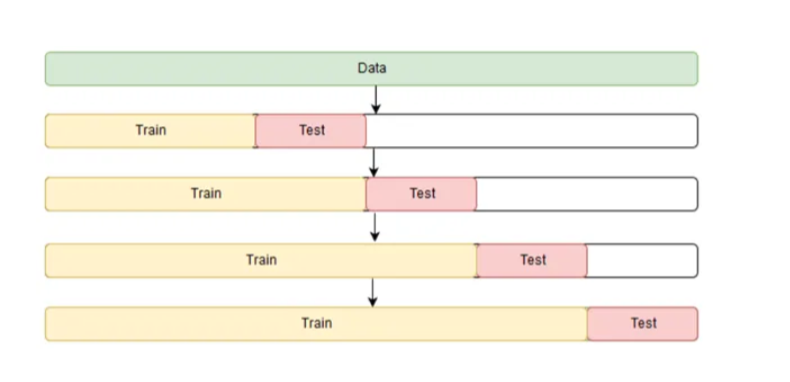
Attribution: [here](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4)

This ensures that the observations in the training set come prior to those in the test set, thus avoiding 'future looking' and preserving the temporal order of the records. Fortunately, scikit-learn has a useful in-built function for computing time series splits, which will be shown below.

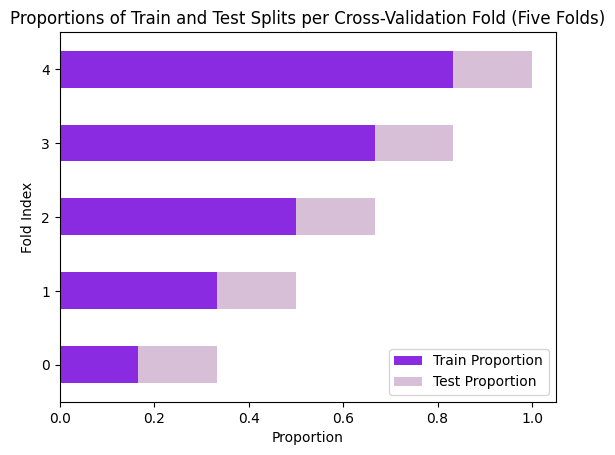

In [138]:
# Ref: https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 5)

# This list will store a dict constaining key-value pairs for the proportion of items in the train and test set for every cross-validation split
splits_proportions = []
# This list will store the X_train, X_test, y_train, y_test groups for each fold/split
splits_data = []

for train_index, test_index in tscv.split(X_kpsa3_2D_df): # Focusing on KPSA3only following analysis of PCA plot!
    # Use the train indices to split the features matrix, getting bigger as a proportion each time
    X_train, X_test = X_kpsa3_2D_df.iloc[train_index, 0:2], X_kpsa3_2D_df.iloc[test_index, 0:2] # Exclude last 'month' column as no longer needed now
    # Use the test indices to get the test rows from the labels (sales volume) data
    y_train, y_test = y_kpsa3.iloc[train_index], y_kpsa3.iloc[test_index]
    split_data = [X_train, X_test, y_train, y_test]
    splits_data.append(split_data)
    # Append a dict storing the proportion of the train and test sets for each fold in the time series cross validation
    splits_proportions.append({
        'Train Proportion': (len(train_index) / X_kpsa3_2D_df.shape[0]),
        'Test Proportion': (len(test_index) / X_kpsa3_2D_df.shape[0])
    })

# Convert the split proportion dicts into a dataframe for easier plotting
splits_df = pd.DataFrame(splits_proportions)

# Plot a stacked horizontal bar chart showing the proportion of the test and train data for each split
colors=['#8A2BE2', '#D8BFD8']
splits_df.plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Proportion')
plt.ylabel('Fold Index')
plt.title('Proportions of Train and Test Splits per Cross-Validation Fold (Five Folds)')
plt.show()

Now that the data has been split into folds for time-series cross-validation, it is time to build a simple linear regression model with the aim of predicting KPA3 (%-change in all retailing sales volume on previous month) as the target/dependent variable or 'label'. The features used are the ones which were passed into the PCA model, i.e.: 'Days Of Airfrost', 'Days With Over 1Mm Rain', 'Mean Temperature (C)', 'Rainfall In Mm' and	'Hours Of Sunshine'. The minimum and maximum temperature columns were excluded from this model due to the fact that they exhibited so much (understandable) correlation with the mean temperature, as was shown on the heat maps and pairplots in the multivariate statistical analysis completed above, and thus can be conceived of as linear combinations of one another to some extent.

In [226]:
print(np.array(X_kpsa3_2D_df.iloc[:, 0]).max(), np.array(X_kpsa3_2D_df.iloc[:, 0]).min())

8.580420718817784 -2.8579673358664444


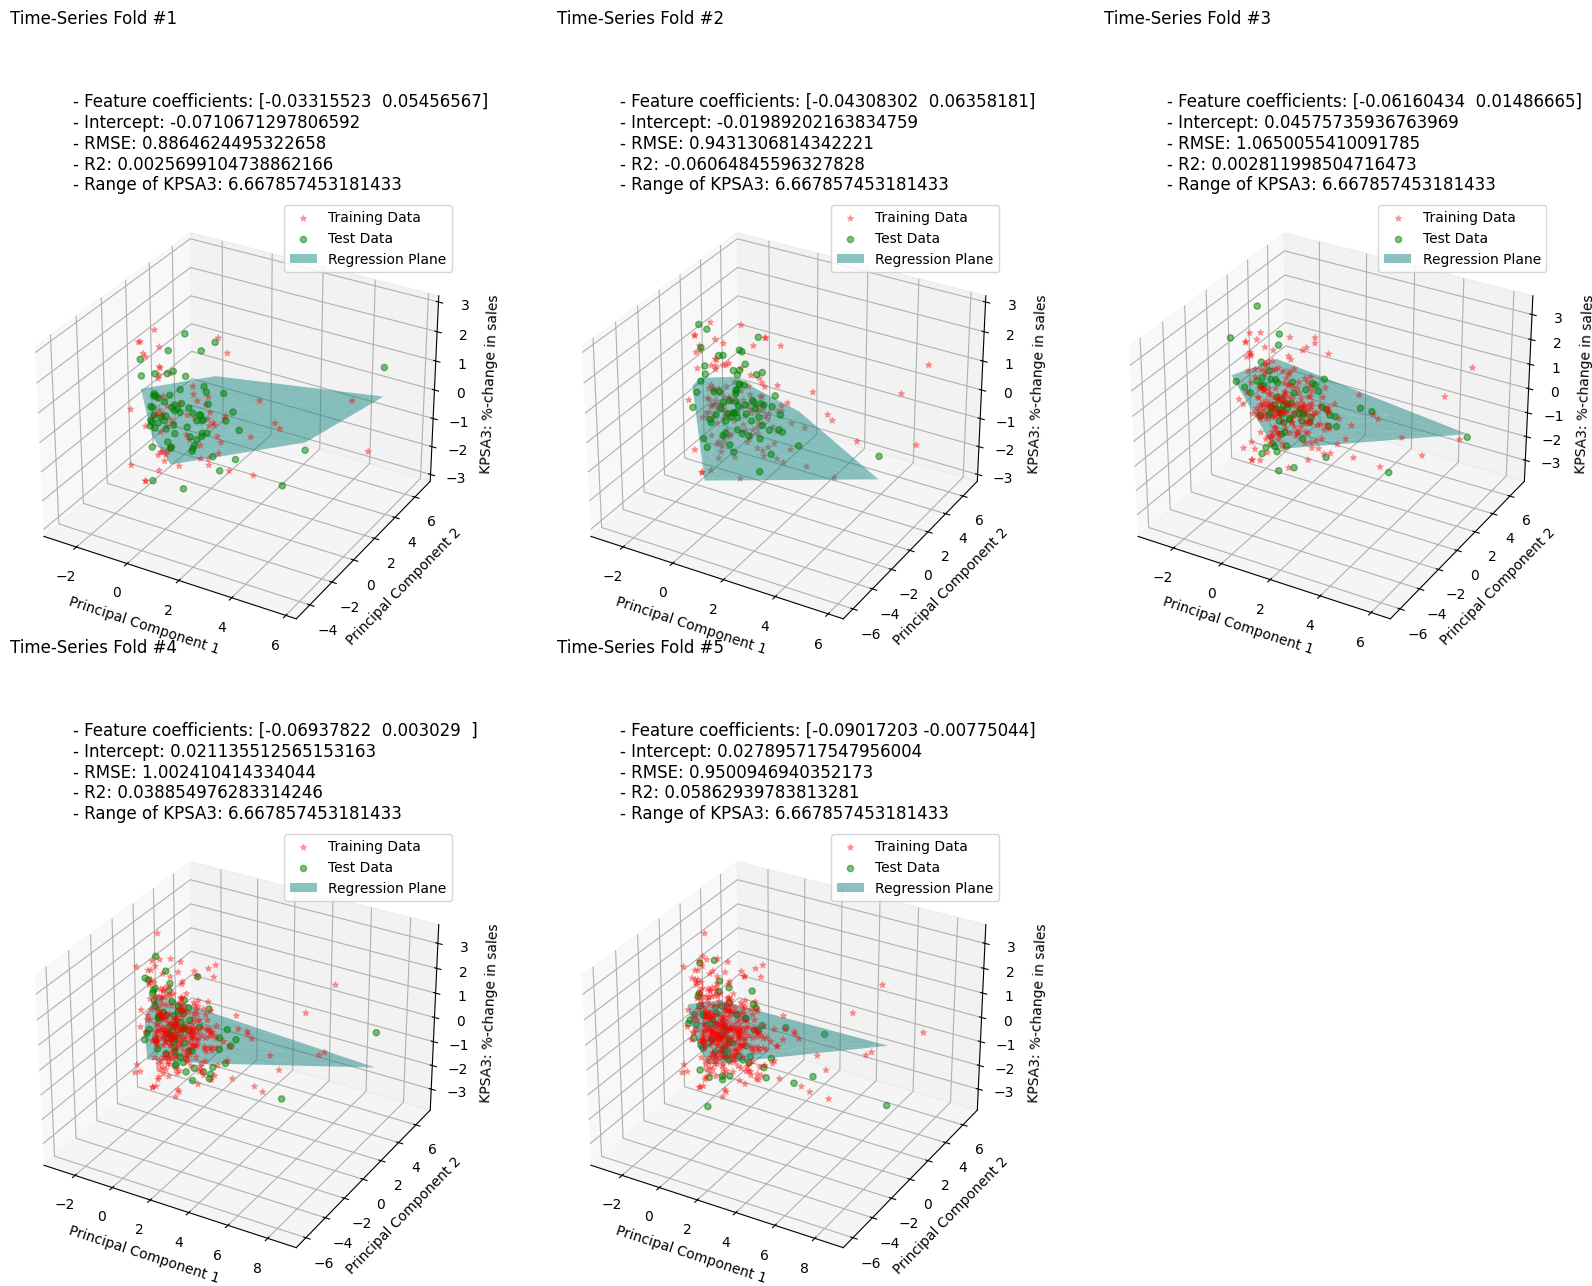

In [339]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Start with simple linear regression (not polynomial) and calculate average scores to measure performance for every cross-val fold

# 1. Choose the class of model (Linear Regression model from scikit-learn)
from sklearn.linear_model import LinearRegression

# Ref for plotting in matplotlib using 3D: https://www.scaler.com/topics/matplotlib/3d-scatter-plot-matplotlib/

# Create a plot grid in matplotlib
fig = plt.figure(figsize=(20, 14))
# Adjust vertical margins/height between subplots
plt.subplots_adjust(hspace=0.4)

# Stores subplot indices for which row/col of the grid to plot the 3d plot on
plot_indices = [231, 232, 233, 234, 235]
# Incremented for each plot to access correct subplot
plot_counter = 0

# Stores mean squared error for each split
root_mean_sq_errors = []
# Stores R2 scores
r2_scores = []

for data_split in splits_data:
    # 2. Set the model hyperparameters (initialize/configure the model)
    # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    # Docs: If fit_intercept siset to False, no intercept will be used in calculations (i.e. data is expected to be centered).
    # Data is not centered, so try setting fit_intercept to 'True' initially
    model = LinearRegression(fit_intercept=True)
    # 3. Configure the data (features matrix and target array) --> get the train and test sets for this cross-validation split/fold
    X_train, X_test, y_train, y_test = data_split
    # 4. Fit the model using the training data (training features matrix and labels stored for each split/fold) to calculate the slope and intercept
    model.fit(X_train, y_train)
    # 5. Apply the model to the test (unseen) data
    y_pred = model.predict(X_test)

     # Calculate the root mean squared error (RMSE): measures how close the regression line is to the data points (mean of errors from y_pred to y_test)
    # Ref: https://www.statology.org/mse-vs-rmse/#:~:text=RMSE%20vs.,units%20of%20the%20response%20variable.
    # RMSE tells us the square root of the average squared difference between the predicted values and the actual values in a dataset.
    # The lower the RMSE, the better a model fits a dataset.
    root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
    root_mean_sq_errors.append(root_mean_sq_error)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Plot the results in 3D
    ax = fig.add_subplot(plot_indices[plot_counter], projection='3d')
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, c='r', marker='*', alpha=0.3, label='Training Data')
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, c='g', marker='o', alpha=0.5, label='Test Data')
    # Plot regression plane using matplotlib pyplot plot_trisurf function
    # This function creates a plane or surface by finding a set of triangles formed between adjacent points on the x (feature 1), y (feature 2),
    # and z (KPSA3 %-change) axes
    # Ref:  https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html#:~:text=plot_trisurf%20%2C%20which%20creates%20a%20surface,%2C%20edgecolor%3D'none')%3B
    ax.plot_trisurf(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='lightseagreen', alpha=0.5, label='Regression Plane')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('KPSA3: %-change in sales')
    ax.legend()
    perct_sales_change_range = np.ptp(np.array(y_kpsa3)) 
    ax.set_title(f'''Time-Series Fold #{plot_counter + 1}
            \n\n
            - Feature coefficients: {model.coef_}
            - Intercept: {model.intercept_}
            - RMSE: {root_mean_sq_error}
            - R2: {r2}
            - Range of KPSA3: {perct_sales_change_range}''', loc='left'
    )
   
    # Ref: https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error#:~:text=The%20Mean%20Squared%20Error%20measures,it%20relates%20to%20a%20function.
    plot_counter += 1
    
plt.show()

The red points on the plot here represent the relationship between the two scaled-down (PCA) features and the target variabel, which is the KPSA3 percentage changes in sales for the training data. The green dots show this same relationship for the test set. The colored plane represents the regression plane (as this cannot be visualized as a line on a multi-featured regression model), or the relationship between the test features and the predicted target outputs. 

The Root Mean Squared Error is a metric used to quantify [how well the model fits a dataset](https://www.statology.org/mse-vs-rmse/#:~:text=RMSE%20vs.,units%20of%20the%20response%20variable.). The Mean Squared Error is just the average of the squared (to stop negative and positive distances from cancelling out) distances between the real and predicted values. Taking the square root to calculate the Root Mean Squared Error is useful because it uses the same units as the target variable (in this context, this is the KPSA3 or percentage-change on previous month in sales volume for all retailing), thus facilitating comparisons and conceptualization of how far off the predictions were from the real values.

As a result, to enable comparisons, the range for the target variable (KPSA3 %-changes) is also shown here, to determine how far off the predictions were using RMSE. As the RMSE is close to 1 for these folds, and the range of the percentage changes is about 6.6, the relative ratio between RMSE and the KPSA range is about 15%. This suggests that a large proportion of the predicted values are close to the real KPSA3 values, which is a better fit than was expected, considering the lack of correlation shown earlier between the weather variables and the sales volume outputs.

The next step will be to try to tune the model further using polynomial features and validation curves in order to calculate the optimal parameters for the model and hopefully reduce the RMSE even more, by comparing different polynomial degrees and whether fitting the intercept leads to improved results or not.

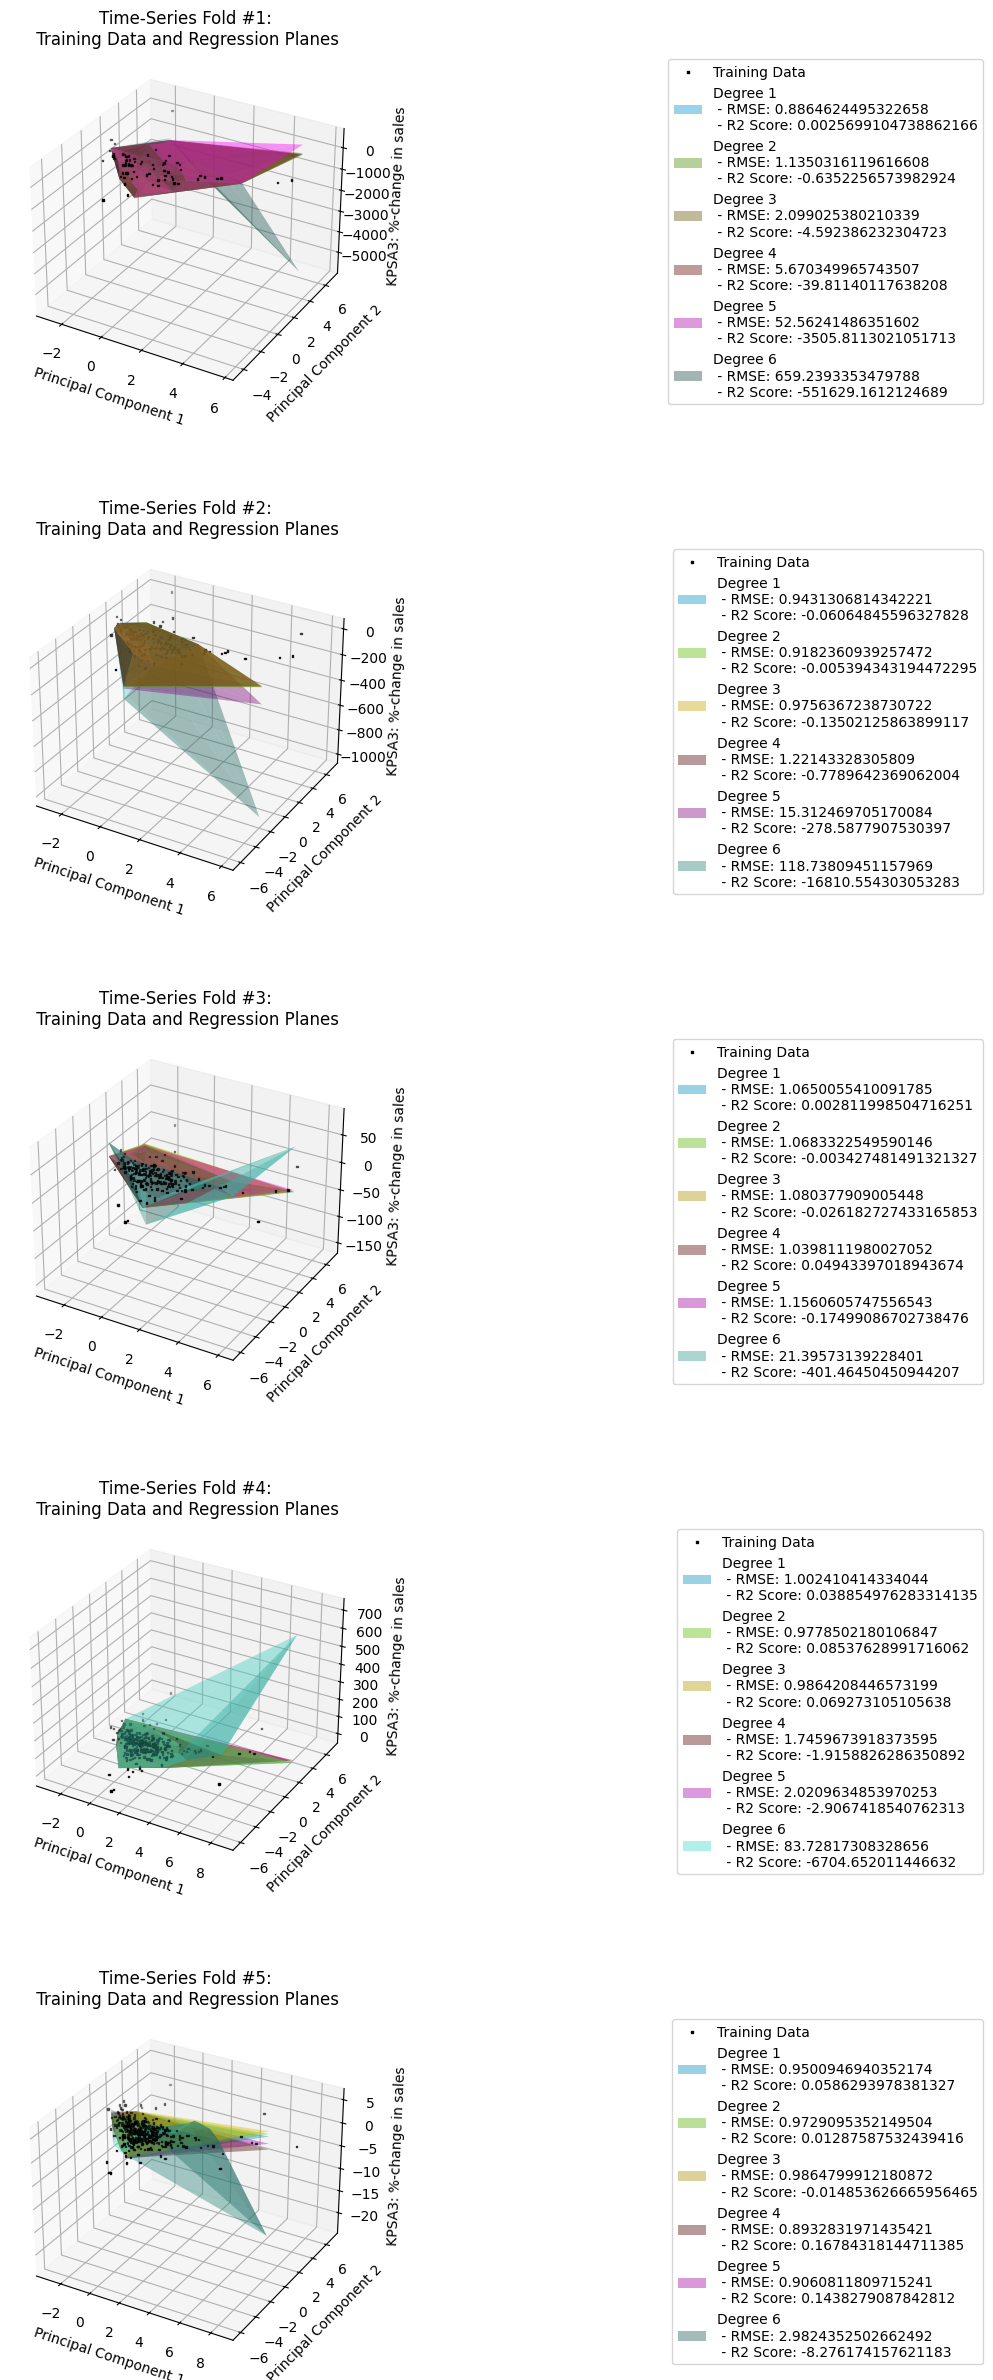

In [341]:
# Trying to improve the model by tweaking the parameters...
from sklearn.preprocessing import PolynomialFeatures # Allows creation of polynomial regression rather than simple linear regression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(**kwargs)
    )

# Create a plot  in matplotlib
fig = plt.figure(figsize=(50, 30))
plt.subplots_adjust(hspace=0.4)

# Stores subplot indices for which row/col of the grid to plot the 3d plot on
plot_indices = [511, 512, 513, 514, 515]
# Incremented for each plot to access correct subplot
plot_counter = 0

# Select highly contrasting colors to highlight different planes for regression planes
colors_for_degree_regression_planes = ['deepskyblue', 'lawngreen', 'gold', 'maroon', 'fuchsia', 'turquoise']

root_mean_sq_errors_all_sets = []
r2_all_sets = []

for data_split in splits_data:
    ax = fig.add_subplot(plot_indices[plot_counter], projection='3d')
    X_train, X_test, y_train, y_test = data_split
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='black', marker='s', s=1, label='Training Data')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('KPSA3: %-change in sales')
    ax.set_title(f'Time-Series Fold #{plot_counter + 1}:\n Training Data and Regression Planes')
    root_mean_sq_errors = []
    r2_scores = []
    for degree in range(1, 7):
        y_pred = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)
      
        root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
        root_mean_sq_errors.append(root_mean_sq_error)

        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        ax.plot_trisurf(
            X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            y_pred,
            alpha=0.4,
            color=colors_for_degree_regression_planes[degree-1],
            label=f'Degree {degree}\n - RMSE: {root_mean_sq_error}\n - R2 Score: {r2}'
        )
        ax.legend(loc='upper right',  bbox_to_anchor=(2.8, 1))
    plot_counter += 1
    root_mean_sq_errors_all_sets.append(np.array(root_mean_sq_errors))
    r2_all_sets.append(r2_scores)
    


The above visualizations demonstrate just how difficult it is to show regression curves in more than 2 dimensions. However, the RMSE scores on the legend show to some extent that as the amount of training data increases (in the increasingly large time-series folds), the optimal degree for the regression model - its complexity - becomes greater too. For instance, for the first fold where under 20% of the training data was used, polynomial regression using a complexity of degree 5 had a RMSE of 52.56, but for the last fold using 80% of the training data, the RMSE for a polynomial of degree 5 was as low as 0.91 to two decimal places. For the largest train-test set, or last fold, the optimal complexity seems to be around degree 4, as this was associated with the lowest RMSE score of 0.89.
